<a href="https://colab.research.google.com/github/rahulkumar-24/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Credit Card Fruad Detection**


#### *Problem Statement*

With the rapid increase in the number of credit card transactions occurring globally, the threat of fraudulent activities has grown significantly. Millions of transactions are processed every second, and while most are legitimate, a small fraction involve fraudulent behavior, posing a serious risk to consumers and financial institutions. Detecting these fraudulent transactions in real-time is critical to prevent substantial financial losses. However, accurately identifying fraud is challenging due to the inherent imbalance in the data, where fraudulent transactions are rare compared to legitimate ones. The problem is to build an efficient and accurate fraud detection model that can classify transactions as fraudulent or legitimate while being aware of the large volume of transactions and minimizing false positives and false negatives.



#### *Objective:*

The primary objective of this project is to develop a machine learning model capable of detecting fraudulent credit card transactions. The model should:
1. Accurately classify fraudulent and legitimate transactions.
2. Handle imbalanced datasets effectively.
3. Minimize the occurrence of false positives (classifying legitimate transactions as fraud) and false negatives (failing to detect fraud).
4. Provide real-time or near-real-time predictions to prevent potential financial losses.


## *About Dataset*

### **Description:**
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

### **Key Features:**

**id:** Unique identifier for each transaction
V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)

**Amount:** The transaction amount

**Class:** Binary label indicating whether the transaction is fraudulent (1) or not (0)


### **Potential Use Cases:**

**Credit Card Fraud Detection:** Build machine learning models to detect and prevent credit card fraud by identifying suspicious transactions based on the provided features.

**Merchant Category Analysis:** Examine how different merchant categories are associated with fraud.

**Transaction Type Analysis:** Analyze whether certain types of transactions are more prone to fraud than others.

**Data Source:** "The dataset, collected from credit card transactions made by European cardholders in 2023, has been anonymized with sensitive information removed to ensure privacy and compliance with ethical guidelines. The data will be imported via the Kaggle API to train the fraud detection model."

#### **Importing Important Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

# Import necessary libraries

from IPython.display import display, HTML
from scipy.stats import skew  # Import the skew function
# Import Plotly.go

import plotly.graph_objects as go
# import Subplots

from plotly.subplots import make_subplots

# Model Train

from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler , StandardScaler , QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.ensemble import GradientBoostingClassifier
# Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

# Remove Warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#### **Importing The Data**

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,

# Set the size of chunks for downloading the dataset to manage memory usage
CHUNK_SIZE = 40960

# Mapping of dataset source names to their respective download URLs (encoded)
DATA_SOURCE_MAPPING = 'credit-card-fraud-detection-dataset-2023:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3752264%2F6492730%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240925%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240925T162407Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D30211eca59f3c200255f3ecd7a9669f6bf807bf74d03fd2545b866c4cb8547179469d99e5a5f4a3093d72e9581d242bcf4f464815da4f41f39cbe65c3eac20970cb4001b6099a7e2857a8b3f212c0a9c8c6c03a7768a54c7a93cc3fb742c768679441cbfdde3c892adeb1cb38635427de54b993b4c4bf2d3a0054be139b3b98eb02a19b03bbefb6d0f2992e8989a7d9e718696286bb21917c9f19975ea2b6001234adba7aad5142e289576e340a2cb83b2d25bb310a83de3958d8163d24f954e81bed5743200d034044f6057eac4bb456f55be8f568507600c33a64e5899588cba08ec3f4a3f1cb4520d367c79044302e4536bdc12efb230e631396b20412fa8'

# Define the standard Kaggle directories
KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

# Unmount and clean up the existing /kaggle/input directory before setting up
!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# Attempt to create symbolic links for easy directory access
try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

# Iterate over each data source, decode the URL, download, and extract the dataset
for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 149953614 bytes downloaded
Downloaded and uncompressed: credit-card-fraud-detection-dataset-2023
Data source import complete.


In [ ]:
#storing the data in "credit_card_df"

credit_card_df = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")

### Dataset Overview

In [ ]:
#viewing the first 10 data of the datase

credit_card_df.head(10)

id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   
5   5  0.025302 -0.140514  1.191138 -0.707979  0.430490  0.458973  0.611050   
6   6  1.016482 -0.397181  0.497868 -0.144463  0.331022  0.629243  0.431262   
7   7 -0.051306 -0.007194  1.139941 -0.877880  0.684668  0.714326  0.892615   
8   8 -0.130680 -0.349547  0.425786 -0.760444  1.702777  2.324816  0.568968   
9   9  0.058419 -0.093507  1.117270 -0.735172  0.466111  0.332371  0.683425   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   
5 -0.092629  0.180811  ... -0.187739 -0.538518 -0.050465 -0.631553 -0.456480   
6 -0.134007  0.796159  ... -0.171137 -0.287017 -0.178197 -1.297597  1.182503   
7 -0.908409  0.901938  ...  0.620676 -0.920426  0.034660 -1.091527 -0.742075   
8  0.049100  0.273118  ... -0.132787 -0.284700 -0.227779  2.248754  0.534846   
9 -0.136674  0.096409  ... -0.203634 -0.601581 -0.145082 -0.654783 -0.196621   

        V26       V27       V28    Amount  Class  
0 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.296503 -0.248052 -0.064512   6531.37      0  
2 -0.312895 -0.300258 -0.244718   2513.54      0  
3 -0.515950 -0.165316  0.048424   5384.44      0  
4  1.071126  0.023712  0.419117  14278.97      0  
5  0.252670  0.066681  0.095812   6901.49      0  
6 -0.604228 -0.198163 -0.087619  18954.45      0  
7 -0.104863 -1.382522 -2.748268  12298.23      0  
8 -0.929738 -0.224385  0.243790  22052.90      0  
9  0.226818  0.057119  0.100629    210.35      0  

[10 rows x 31 columns]

In [ ]:
#viewing the last 10 data of the dataset

credit_card_df.tail(10)

id        V1        V2        V3        V4        V5        V6  \
568620  568620 -1.604804  0.972534 -1.749894  1.920681 -1.856257 -0.219136   
568621  568621 -0.739211  0.231882 -0.410204  0.511278  0.056859 -0.410720   
568622  568622 -0.838047  0.362350 -0.061538  0.252811 -0.006436 -0.222957   
568623  568623 -0.873853  0.780667 -0.418023  0.399324  0.522744  0.943413   
568624  568624 -0.542349  0.585098 -0.547730  1.005465 -0.702046 -0.287417   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22       V23  \
568620 -1.924278  0.089723 -1.563884  ... -0.425927  1.413597  0.702164   
568621 -0.383799 -0.313642  0.098006  ...  0.283048 -0.603132 -0.479224   
568622  0.015602 -0.760310  1.783928  ...  0.561658 -0.270249 -0.491720   
568623 -0.438929 -1.634671  1.776622  ...  2.518959 -1.899197  0.721274   
568624 -0.835174  0.382365 -1.281525  ...  0.463312  0.705032 -0.124074   
568625 -0.370393  0.189694 -0.938153  ...  0.167503  0.419731  1.288249   
568626 -0.016935 -0.147733  0.483894  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140788  0.536523 -0.211100   
568628  0.580568 -0.207723  0.893527  ... -0.060381 -0.195609 -0.175488   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157303   

             V24       V25       V26       V27       V28    Amount  Class  
568620 -0.468054 -1.723380  0.571744  0.378728 -3.747798  21149.12      1  
568621 -0.453026 -0.005507 -1.644165 -0.913953  1.292782  18363.07      1  
568622  1.269701 -0.647563 -1.681372 -3.041399 -1.420988  14631.81      1  
568623  0.269306 -0.850062 -0.652306 -0.153297  1.860894  11591.09      1  
568624  0.046466 -0.196141  0.553614  1.222537  1.172982  10145.64      1  
568625 -0.900861  0.560661 -0.006018  3.308968  0.081564   4394.16      1  
568626 -0.846452 -0.153443  1.961398 -1.528642  1.704306   4653.40      1  
568627 -0.448909  0.540073 -0.755836 -0.487540 -0.268741  23572.85      1  
568628 -0.554643 -0.099669 -1.434931 -0.159269 -0.076251  10160.83      1  
568629  0.931030 -0.349423 -1.090974 -1.575113  0.722936  21493.92      1  

[10 rows x 31 columns]

In [ ]:
#viewing the shape of dataset

credit_card_df.shape

(568630, 31)

In [ ]:
#viewing the datatype of each column

credit_card_df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# checking for any null value in the dataset

credit_card_df.isnull().sum()


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Create a dictionary to hold the descriptive statistics for each column
descriptive_stats = {}

# Loop through each column and calculate the descriptive statistics
for col in credit_card_df.columns:
    descriptive_stats[col] = credit_card_df[col].describe()

# Convert the dictionary to a DataFrame for better display
stats_df = pd.DataFrame(descriptive_stats)



# Define the HTML and CSS to make the DataFrame scrollable
def display_scrollable_df(df, width = 1000, height = 400):
    style = f"""
    <style>
    .scrollable_dataframe{{
      display:block;
      overflow-x : auto;
      white-space: nowrap;
      width: {width}px;
      height: {height}px;
    }}
    </style>
    """
    display(HTML(style + df.to_html(classes ='scrollable-dataframe',float_format ='%.6f')))


# Call the function to display the scrollable table
display_scrollable_df(stats_df)


In [ ]:
#checking for any duplicate value

credit_card_df.duplicated().sum()


0

In [ ]:
#droping id column since it will not contribute any thing in our further analysis and model building

credit_card_df.drop('id', axis = 1 , inplace = True)

In [ ]:
# shape after removing 'id' column

credit_card_df.shape

(568630, 30)

### **Analysis Till Now From the Dataset**

1. **The data types for all columns, from V1 to Amount all are numerical and of float type.**
2. **No Missing or Duplicate Values**:
   - The dataset contains **zero null values**, ensuring that no imputation or cleaning for missing data is required.
   - There are also **zero duplicate rows**, confirming that the data is unique and free from redundancy.

3. **Dropping the 'ID' Column**:
   - The **'ID'** column has been dropped as it is an identifier that does not hold any predictive value for classifying transactions and does not contribute to the analysis.

4. **Mean = 0 and Standard Deviation (std) ≈ 1**:
   - Most of the dataset has been **standardized**, with features (V1 to V23) having a mean of approximately 0 and a standard deviation close to 1. This ensures that all features contribute equally to the model, which is especially crucial for distance-based algorithms like k-NN and SVM.

5. **Outliers**:
   - Several potential **outliers** were identified based on the **min** and **max** values. For example, **V5** has a maximum value of **42.716891**, and **V7** has a maximum value of **217.873038**. These extreme values may warrant further investigation, as they could indicate fraudulent activities or anomalies in the dataset.

6. **Standardization of the 'Amount' Column**:
   - The 'Amount' column shows a wide range of values (mean = 12041.96, std = 6919.64), much larger than the standardized columns. Without standardizing 'Amount', models could overemphasize it, leading to biased predictions. Standardizing the 'Amount' column ensures that it is on the same scale as other features, making it suitable for models that are sensitive to feature magnitudes.

### Summary:
- The data is **clean** with no missing or duplicate values.
- The **'ID' column has been removed** as it does not add value to the analysis.
- The data has been **standardized** (mean = 0, std = 1) to prepare it for machine learning models.
- Outliers are present and require further exploration, and the 'Amount' column will be **standardized** to prevent bias in the analysis.

### **Standardize the 'Amount' column**

In [ ]:
# Initialize the StandardScaler

scaler = StandardScaler()

# Select the 'Amount' column from the DataFrame and reshape for scaling
credit_card_df['Amount_scaled'] = scaler.fit_transform(credit_card_df[['Amount']])

# Verify the standardization by checking the mean and std of the scaled column
print(credit_card_df['Amount_scaled'].mean(), credit_card_df['Amount_scaled'].std())

-4.02123978325023e-16 1.000000879307563


* #### The results after standardizing the "Amount_Scaled" column indicate that the operation was successfully executed.

* #### Now We Wil Drop The Given Amount Column Because It Consit Data Of Very High Range In Compare With Other Feature

* #### Next, we will conduct Exploratory Data Analysis (EDA) to gain a better understanding of the data. We will analyze the outliers present in the dataset and address them using appropriate methods.

In [ ]:
# Drop The Given Amount Column Because It Consit Data Of Very High Range In Compare With Other Feature

credit_card_df.drop('Amount', axis=1, inplace=True)


#### EDA(Exploratory Data Analysis)

1. Visualizing the distribution of the 'Class' column, which is our target variable.

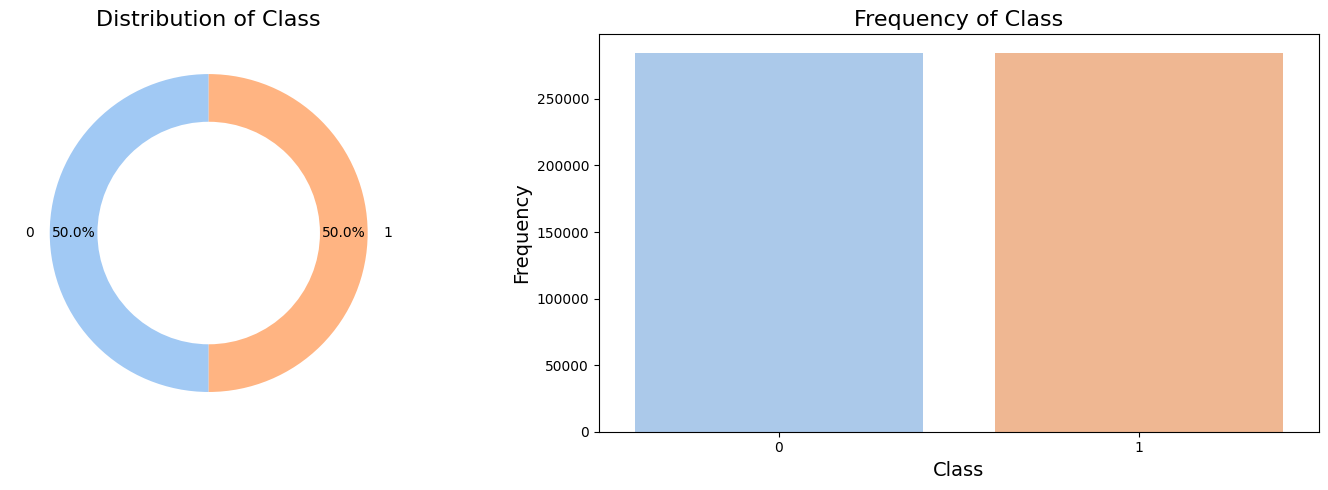

In [ ]:
# Specify the column name for analysis
column_name = 'Class'
value_counts = credit_card_df[column_name].value_counts()  # Count unique values in the specified column

# Set up the figure with two subplots side by side
fig, (graph1, graph2) = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1]})

# Donut pie chart
pie_colors = sns.color_palette("pastel")  # Get a pastel color palette for the pie chart

# Create a pie chart with value counts
graph1.pie(value_counts, autopct='%0.1f%%', startangle=90, pctdistance=0.85, colors=pie_colors, labels=value_counts.index)

# Create a circle in the center of the pie chart to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Create a white circle at the center
graph1.add_artist(centre_circle)  # Add the circle to the pie chart

# Set the title for the pie chart
graph1.set_title(f'Distribution of {column_name}', fontsize=16)  # Title with a specified font size

# Bar graph
sns.barplot(x=value_counts.index, y=value_counts.values, palette=pie_colors)

# Set the title and labels for the bar graph
graph2.set_title(f'Frequency of {column_name}', fontsize=16)  # Title for the bar graph
graph2.set_xlabel(column_name, fontsize=14)                   # Label for the X-axis
graph2.set_ylabel('Frequency', fontsize=14)                    # Label for the Y-axis


plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()         # Display the plots


### Observation From The Vizulization


- The Class Column is **perfectly balanced**, with 50% non-fraudulent (0) and 50% fraudulent (1) transactions.
- There is an equal number of fraud and non-fraud cases, which suggests that there is no class imbalance in the data.


#### Since all of the columns are continuous, we will plot histograms for all the columns to visualize the distribution of data.

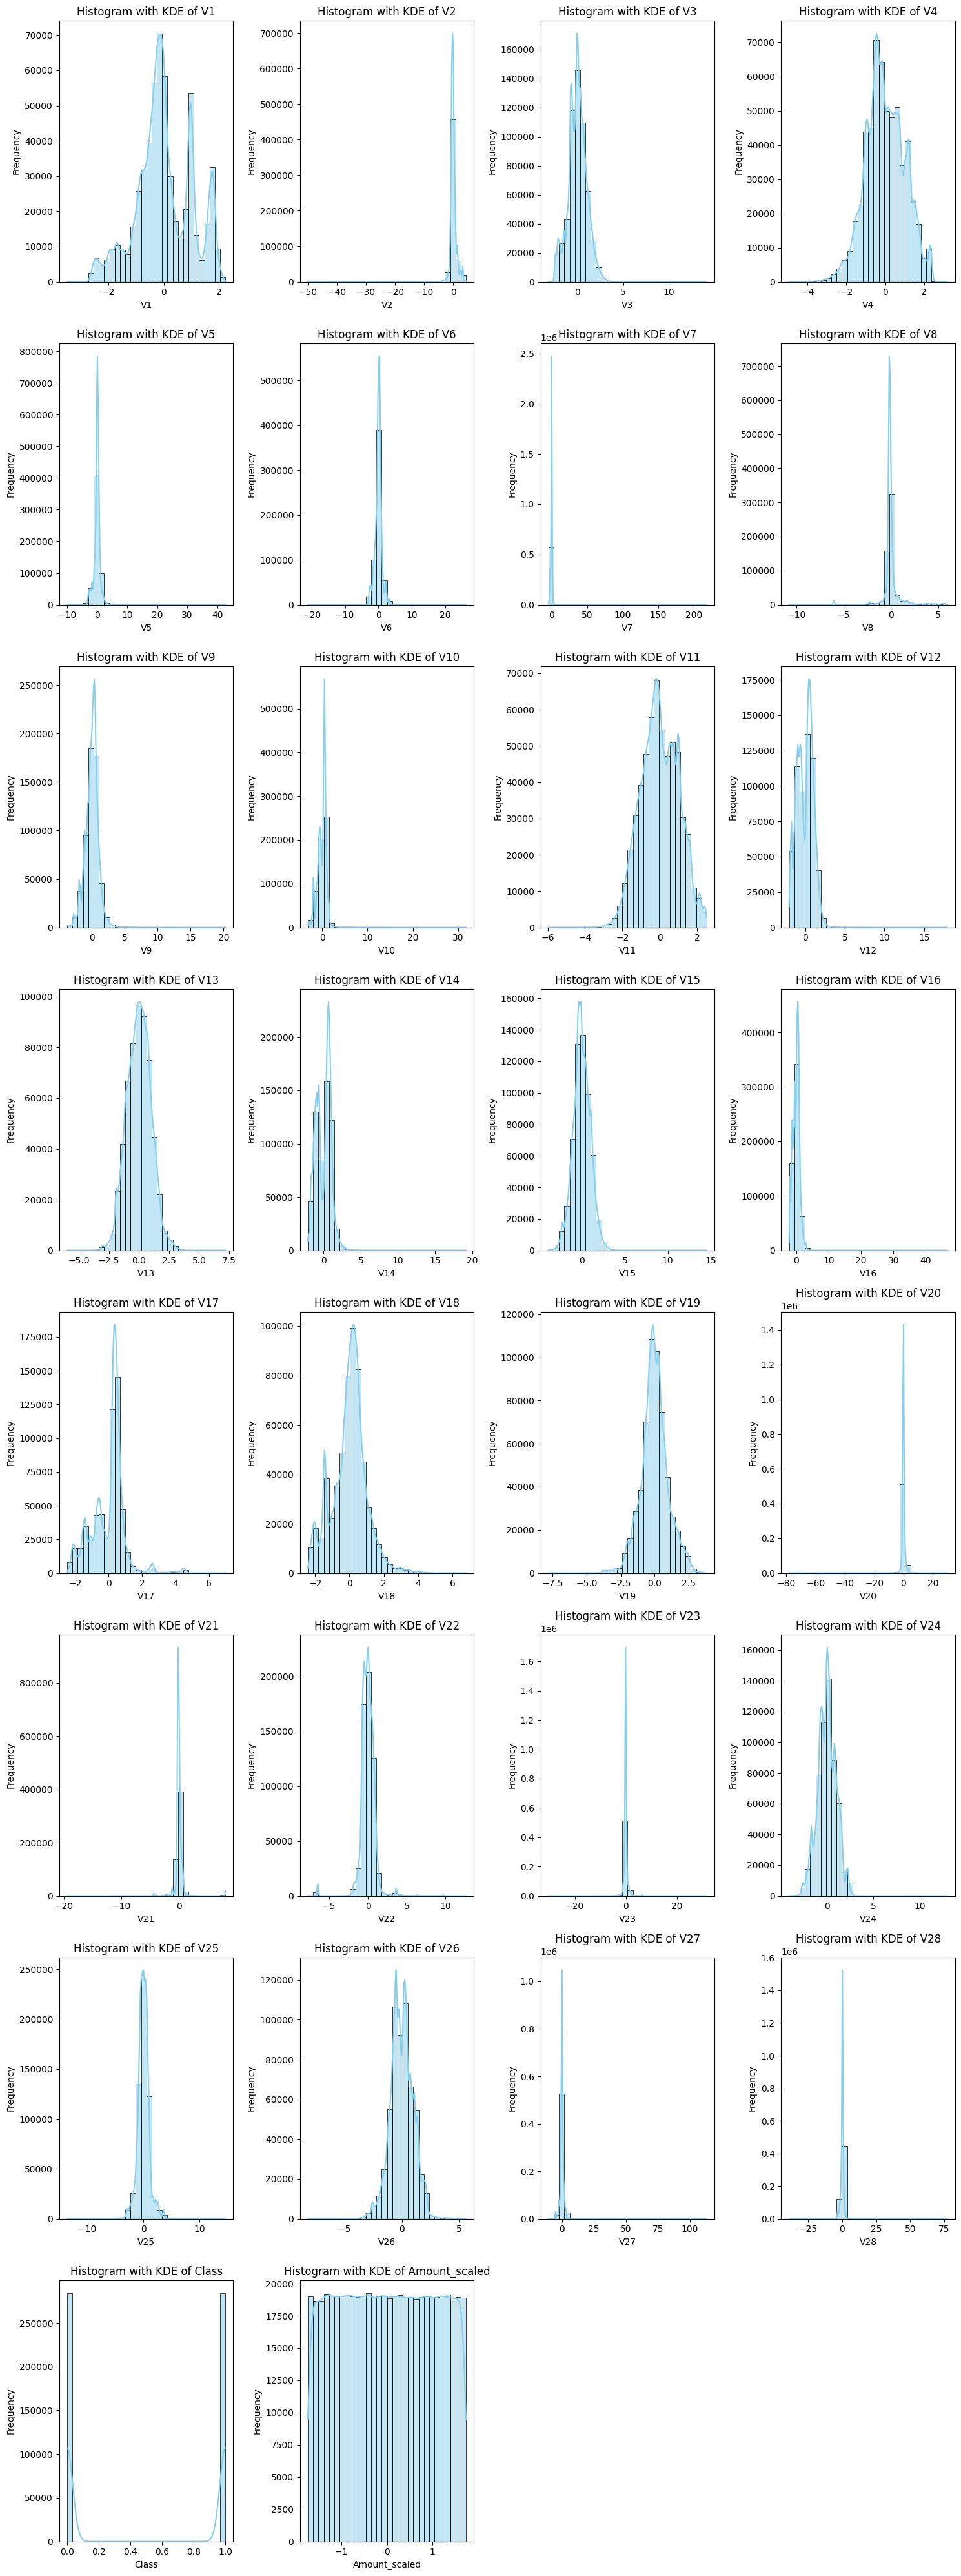

In [ ]:
# List of continuous columns (replace with your actual continuous columns)
continuous_columns = credit_card_df.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure for subplots
n_cols = 4  # Number of columns in the grid
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a histogram with KDE for each continuous column
for i, column in enumerate(continuous_columns):
    sns.histplot(credit_card_df[column], kde=True, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(f'Histogram with KDE of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots


- **V1**: The distribution is roughly normal but slightly skewed to the left. Most values are concentrated around 0, with fewer values extending into the negative range.
  
- **V2**: The distribution is highly skewed to the left, with a significant number of values concentrated near 0 and a long tail of negative values.

- **V3**: The distribution is slightly skewed to the right. Most values are near 0, but there is a notable tail extending into the positive range.

- **V4**: The distribution is approximately normal with a slight skew to the left. Most of the values are concentrated between -2 and 1, with few extreme values on either side.
  
- **V5**: The distribution is highly skewed to the right, with most values clustered near 0, and a long tail extending into large positive values, indicating the presence of significant outliers.

- **V6**: The distribution is also highly concentrated around 0, with a narrow spread and a few outliers extending in both directions, though primarily towards the positive side.

- **V7**: The distribution is highly skewed to the right, with most values clustered near 0 and a long tail extending to values above 150. This indicates the presence of significant outliers and a concentration of smaller values.

- **V8**: The distribution is centered around 0, approximately normal, with most values concentrated between -1 and 1. There are a few extreme values on both sides, though the overall spread is narrow.

- **V9**: The distribution is also concentrated near 0, with a peak between 0 and 5. It has a narrow spread but includes a few outliers extending to values above 10.

- **V10**: The distribution is highly skewed to the right, with a sharp peak near 0 and a long tail extending to larger values, indicating the presence of extreme outliers. Most of the data is clustered around smaller values close to 0.

- **V11**: The distribution is approximately normal, with a slight skew to the left. Most of the values are concentrated between -2 and 2, forming a bell-shaped curve, with fewer extreme values on either side.

- **V12**: The distribution is skewed to the right, with most of the values concentrated between -2 and 2. There is a long tail extending towards larger positive values, indicating the presence of outliers.

- **V13**: The distribution is approximately normal, centered around 0 with most values falling between -4 and 4. It shows a bell-shaped curve, which suggests that the variable follows a normal distribution with a few mild outliers on both sides.

- **V14**: The distribution is heavily skewed to the right, with a large spike near 0 and a long tail extending towards larger values, indicating the presence of extreme outliers. Most of the data points are concentrated around smaller values.

- **V15**: The distribution is nearly normal with a peak around 0, though slightly skewed to the left. Most values are between -2.5 and 2.5, with the distribution tapering off more sharply on the positive side.

- **V16**: The distribution is approximately normal, centered around 0 with most values falling between -2 and 2. It shows a bell-shaped curve, which suggests that the variable follows a normal distribution with a few mild outliers on both sides.

- **V17**:The distribution is slightly skewed to the right, with a prominent peak near 0 and a wider spread extending towards larger values. Most of the data points are concentrated around smaller values, indicating some variability but with a central tendency near zero.

- **V18**:The distribution is multimodal with several peaks, indicating the presence of multiple subgroups within the data. Most values are between -2 and 6, with the distribution showing significant variability and a more even spread across the range.

- **V19**:The distribution is approximately normal, centered around 0 with most values falling between -2 and 2. It shows a bell-shaped curve, which suggests that the variable follows a normal distribution with a few mild outliers on both sides.

- **V20**:The distribution is heavily skewed to the right, with a narrow peak at 0 and long tails extending towards -20 and 20. This indicates the presence of extreme outliers, with most data points concentrated around smaller values.

- **V21**:The distribution is nearly normal with a peak around 0, though slightly skewed to the left. Most values are between -5 and 5, with the distribution tapering off more sharply on the positive side.

- **V22**:The distribution is approximately normal, centered around 0 with most values falling between -10 and 15. It shows a bell-shaped curve, suggesting that the variable follows a normal distribution with a few mild outliers on both sides.

- **V23**:The distribution is more spread out with a lower peak around 0. The values range roughly from -5 to 5, indicating some variability but with a central tendency near zero.

- **V24**:The distribution is similar to V22 but slightly more spread out. The range extends approximately from -25 to 25, indicating significant variability and the presence of outliers.

- **V25**:The distribution is slightly skewed to the left, with a sharp peak close to 0. Most values fall between -2 and 2, indicating a high concentration around the mean. The frequency reaches up to 250,000, suggesting a large number of observations near the center.

- **V26**:The distribution is more spread out with multiple peaks, indicating variability in the data. Most values are between -5 and 5, with the highest frequency around 120,000. This suggests the presence of several subgroups within the data.

- **V27**:The distribution is even wider than V26, with values ranging from -15 to 15. The frequencies are much lower, peaking just over 1.5, indicating a more uniform spread of data points across the range.

- **V28**:The distribution is approximately normal, centered around 0 with most values falling between -2 and 2. It shows a bell-shaped curve, suggesting that the variable follows a normal distribution with a few mild outliers on both sides.

- **Amount**:The distribution is uniform, with a high frequency at the lower end. This indicates that most transactions are of smaller amounts, with fewer transactions involving larger amounts.

- **Class**:The distribution is binary, with two distinct spikes. This suggests that the variable represents a classification into two categories, likely indicating a categorical variable with two possible values.

- **Amount_scaled**:The distribution is uniform, with values evenly spread across the range from approximately -1.5 to 1.5. Each bar in the histogram has almost the same height, indicating that the data points are uniformly distributed across the bins. The Kernel Density Estimate (KDE) line closely follows the tops of the bars, further confirming the uniform distribution.

#### **Now Ploting Multiple Column For Better Analysis**

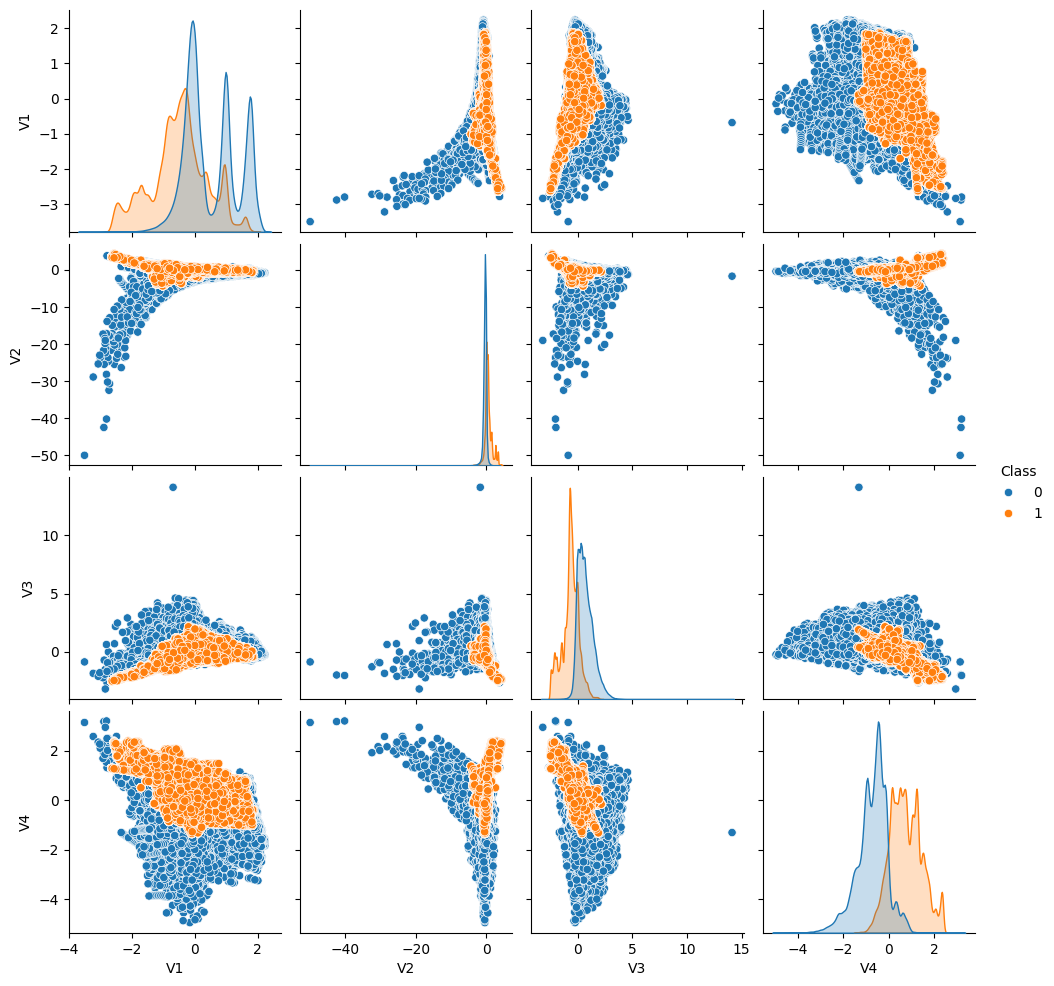

In [ ]:
# Selecting specific columns to analyze and plotting pairwise relationships in the dataset
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'Class']

# Extracting the data for the specified columns
data_to_plot = credit_card_df[columns_to_plot]

# Creating a pairplot to visualize the distributions and relationships between variables, colored by 'Class'
sns.pairplot(data_to_plot, hue='Class')

# Displaying the plot
plt.show()


From the pair plot provided, which displays relationships between various features (`V1`, `V2`, `V3`, and `V4`) of credit card transactions, differentiated by class (0 for no fraud and 1 for fraud), we can derive several insights:

1. **Distribution Differences**: There are distinct differences in the distributions of each feature when comparing fraudulent transactions (class 1) to non-fraudulent transactions (class 0). For example, in certain plots like those involving `V3` or `V4`, fraudulent transactions tend to cluster in specific ranges while non-fraudulent transactions are more spread out.

2. **Feature Separation**: Some features show better separation between classes than others. For instance, the scatter plots and density plots for `V3` indicate a better separation between Class 0 and Class 1 compared to `V1` and `V2`. This suggests that `V3` might be a more predictive feature for distinguishing between fraudulent and non-fraudulent transactions.

3. **Density Plots**: The density plots along the diagonal provide a clear view of how the values of each feature are distributed within each class. These plots indicate which values are more likely to correspond to fraudulent or non-fraudulent transactions. For example, negative values in `V3` are more associated with fraud.

4. **Outliers**: The presence of outliers, particularly in features like `V2`, can be seen where there are dots far removed from the main clusters. These outliers may be significant in fraud detection and could be indicative of anomalous behavior that is characteristic of fraud.

5. **Overlap Areas**: There are regions where the data points of both classes overlap, especially noticeable in `V1` and `V2`. This overlap suggests that using these individual features alone may not be sufficient to accurately classify fraud and that combinations or interactions between features might be necessary for better discrimination.

6. **Class Imbalance**: The plots show a higher concentration of blue points (class 0) compared to orange points (class 1), indicating a class imbalance which is typical in fraud detection scenarios. This imbalance means that predictive models need to be carefully calibrated to avoid bias toward the more frequent class.


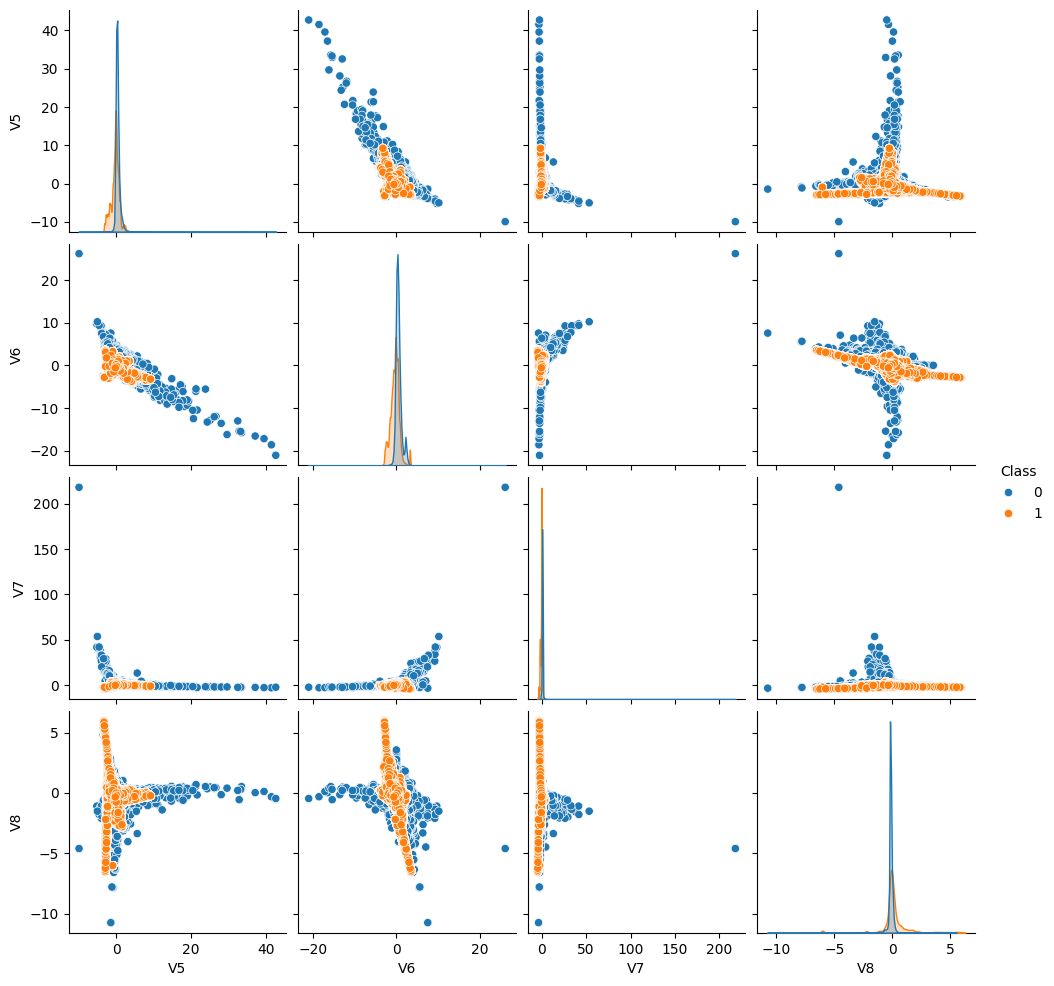

In [ ]:
# Selecting additional columns to analyze and plotting pairwise relationships in the dataset
column_to_plot = ['V5', 'V6', 'V7', 'V8', 'Class']

# Extracting the data for the specified columns
data_to_plot = credit_card_df[column_to_plot]

# Creating a pairplot to visualize the distributions and relationships between variables, colored by 'Class'
sns.pairplot(data_to_plot, hue='Class')

# Displaying the plot
plt.show()


The pair plot shown, detailing relationships between the features `V5` to `V8` for classes 0 (no fraud) and 1 (fraud), provides several notable insights into the data:

1. **Distinct Patterns**: Similar to the previous plot, there are clear patterns and differences in distribution between fraudulent and non-fraudulent transactions. These visual distinctions are crucial for feature selection in machine learning models aimed at fraud detection.

2. **Feature `V7`**:
   - **Outliers**: `V7` exhibits significant outliers, especially visible in its distribution plot and in the scatter plots involving `V7`. These outliers are primarily associated with non-fraudulent transactions but could be critical when tuning anomaly detection algorithms.
   - **Bimodal Distribution**: The distribution for fraudulent transactions in `V7` appears bimodal (having two peaks), suggesting different types of fraud behaviors that might correspond to different underlying mechanisms of fraud.

3. **Feature `V6` and `V8` Interaction**:
   - The scatter plot between `V6` and `V8` shows that for non-fraudulent transactions, the data points are densely packed into a specific region, whereas fraudulent transactions are more spread out. This spread in the case of fraud might indicate that these features capture aspects of transactions that are manipulated by fraudsters.

4. **Feature `V5`**:
   - The scatter plots involving `V5` and other features (`V6`, `V7`, `V8`) show that fraudulent transactions tend to cluster distinctly from non-fraudulent ones, particularly for negative values in `V5`. This suggests `V5` might be influential in identifying fraudulent transactions.

5. **Data Distribution and Density**:
   - The diagonal density plots show how each feature's values are distributed within the fraud and no-fraud classes. These plots are skewed for several features, which might necessitate data transformation or normalization to improve the performance of predictive models.

6. **Potential Feature Interactions**:
   - Certain plots, such as between `V7` and `V8`, suggest that interactions between features might provide additional discriminatory power that isn't evident when considering the features individually. These interactions could be explored further to enhance model accuracy.


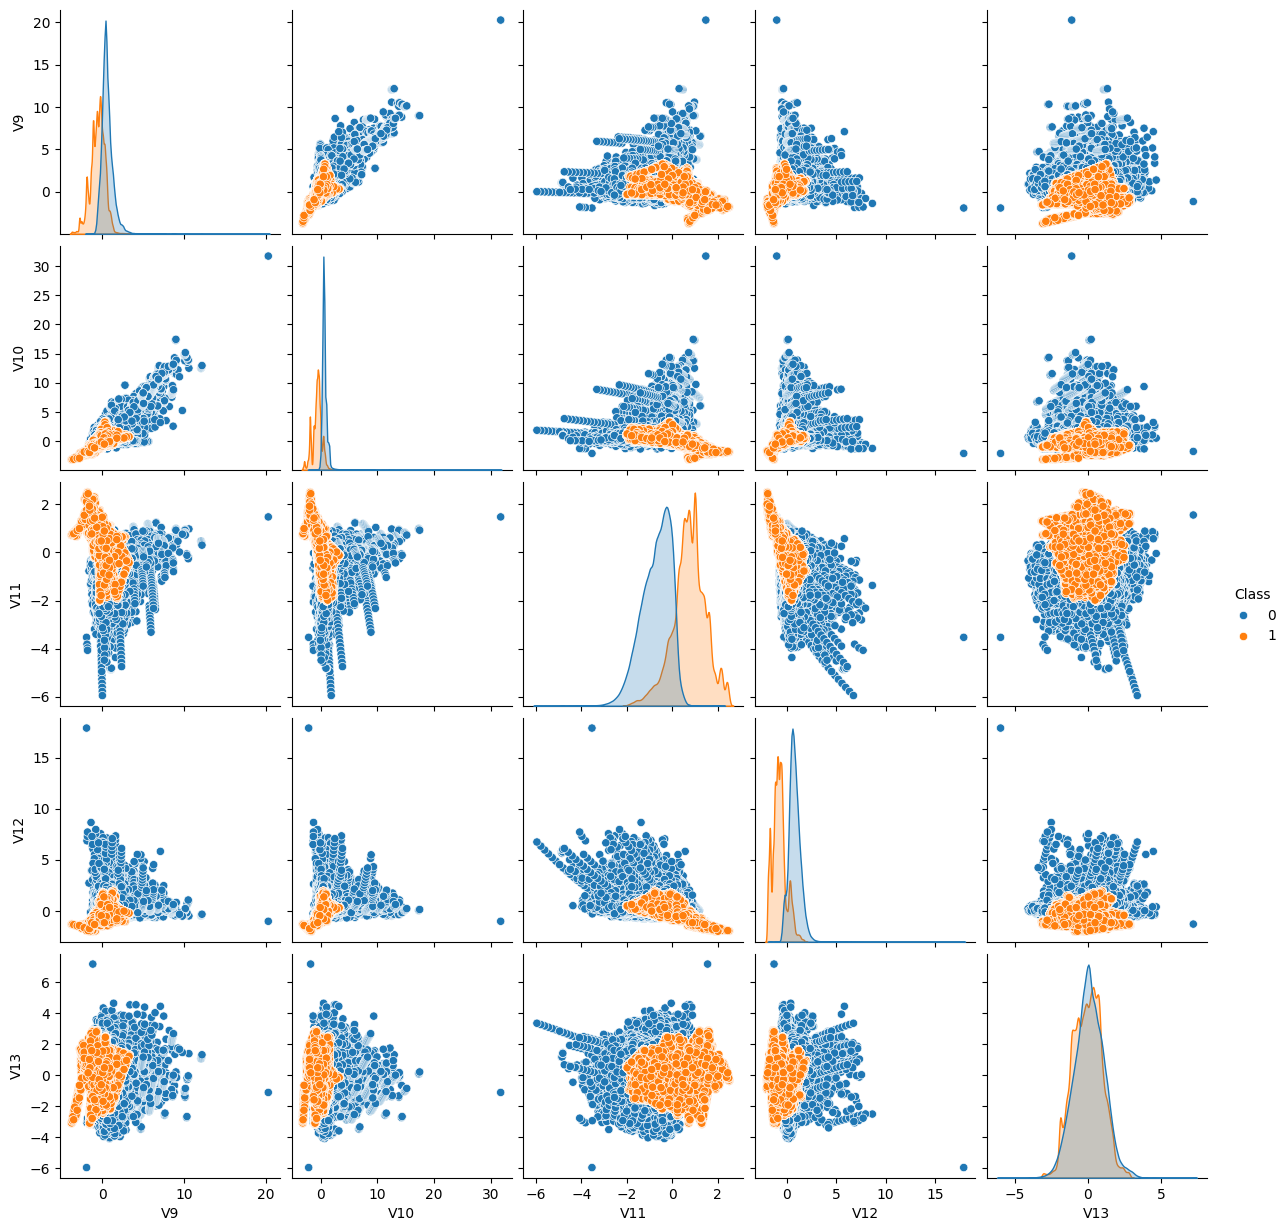

In [ ]:
# Selecting another set of columns to analyze and plotting pairwise relationships in the dataset
column_to_plot = ['V9', 'V10', 'V11', 'V12', 'V13', 'Class']

# Extracting the data for the specified columns
data_to_plot = credit_card_df[column_to_plot]

# Creating a pairplot to visualize the distributions and relationships between variables, colored by 'Class'
sns.pairplot(data_to_plot, hue='Class')

# Displaying the plot
plt.show()


The pair plot shown, highlighting the interactions between features `V9` to `V13` across classes 0 (genuine) and 1 (fraud), offers insightful observations about the data:

1. **Strong Separation in Select Features**: Notably, features like `V9`, `V10`, `V11`, `V12`, and `V13` demonstrate clear distinctions in their distributions when comparing fraudulent to non-fraudulent transactions. This separation is evident in both scatter plots and histograms, where fraudulent transactions often form distinct clusters or follow unique patterns.

2. **Significance of `V11`**:
   - **Key Indicator**: `V11` emerges as a particularly significant predictor, with fraudulent activities densely concentrated within a specific range of `V11` values. This distinct pattern suggests a strong link between `V11` and fraudulent behavior.
   
3. **Less Informative Features**:
   - **Ambiguity in `V13`**: Although `V13` shows some differentiation between the classes, the overlap is more pronounced, indicating that `V13` may not be as effective alone in detecting fraud.

4. **Complex Relationships**:
   - **Non-linear Dynamics**: The scatter plots reveal that many relationships between these variables are non-linear, hinting that traditional linear models might not adequately capture the nuances of the dataset. Thus, non-linear approaches, such as decision trees or support vector machines, may yield better performance by embracing the complexity of these interactions.


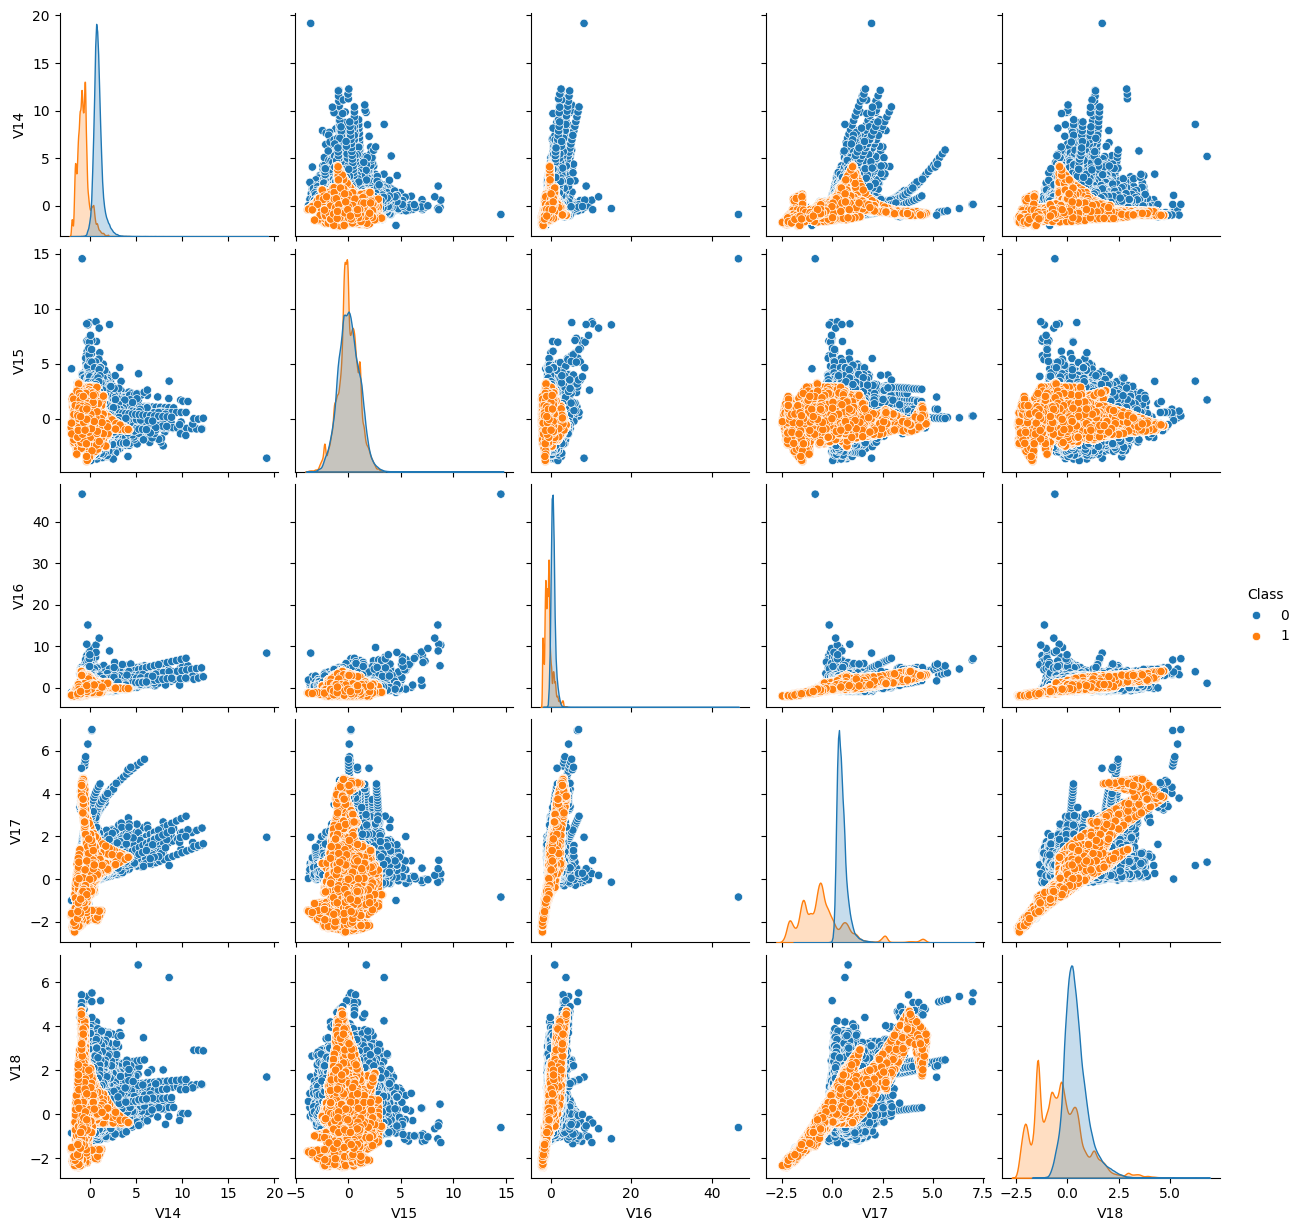

In [ ]:
# Selecting yet another set of columns for analysis and plotting pairwise relationships in the dataset
column_to_plot = ['V14', 'V15', 'V16', 'V17', 'V18', 'Class']

# Extracting the data for the specified columns
data_to_plot = credit_card_df[column_to_plot]

# Creating a pairplot to visualize the distributions and relationships between variables, colored by 'Class'
sns.pairplot(data_to_plot, hue='Class')

# Displaying the plot
plt.show()


The pair plot, focusing on principal components V14, V15, V16, V17, and V18 for Class 0 (legitimate transactions) and Class 1 (fraudulent transactions), offers several important insights:

### Distinct Patterns:
Like the previous plot, clear patterns emerge, highlighting differences in distribution between fraudulent and non-fraudulent transactions. These distinctions are key for feature selection in fraud detection models.

### Feature V14:
- **Clear Separation**: The scatter plots involving V14, especially with V17 and V18, show a distinct separation between the two classes. Fraudulent transactions tend to cluster in specific regions, making V14 particularly useful for classification.
  
### Feature V17:
- **Strong Discriminatory Power**: The pairing of V14 with V17 provides one of the most distinct separations between fraudulent and non-fraudulent transactions. Fraud cases form a unique, curved region, suggesting V17 is highly informative for fraud detection.

### Feature V16 and V18 Interaction:
- **Overlapping Distributions**: While there is some overlap between classes in the V16 vs. V18 plot, fraudulent transactions are more concentrated at lower values of both features. This subtle difference could be leveraged in a model to enhance detection accuracy.

### Feature V15:
- **Less Discriminatory Power**: Compared to the other components, V15 seems less effective at distinguishing between classes. The distributions of Class 0 and Class 1 overlap significantly when paired with other features, indicating limited value for fraud detection.

### Data Distribution and Density:
- **Non-linear Boundaries**: The diagonal density plots show that the distributions for several features are skewed, and the separation between the classes isn't linear. This suggests that more complex models, such as support vector machines or decision trees, might be more effective than linear classifiers.

### Potential Feature Interactions:
- **V14 and V17 Interaction**: Similar to interactions like V7 and V8, the interplay between V14 and V17 highlights potential additional discriminatory power. Exploring these interactions further could enhance model accuracy.





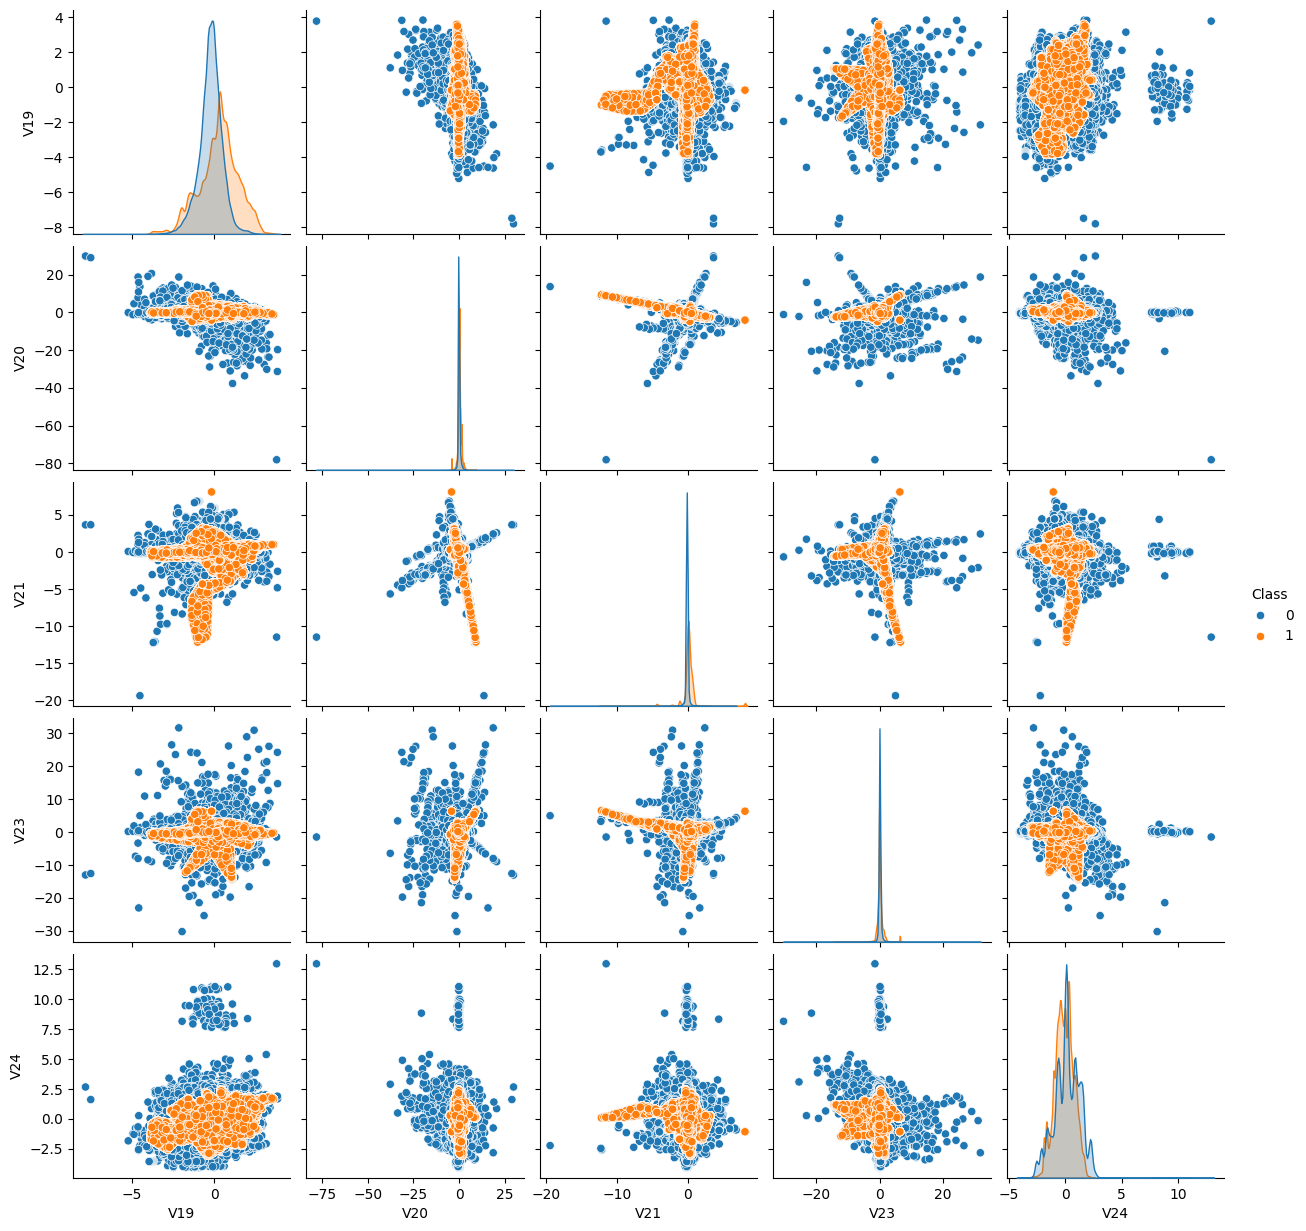

In [ ]:
# Defining a new set of columns to analyze the distribution and relationships in the dataset
columns_to_plot = ['V19', 'V20', 'V21', 'V23', 'V24', 'Class']

# Extracting the data for the specified columns
value_to_plot = credit_card_df[columns_to_plot]

# Creating a pairplot to visualize the distributions and relationships between the selected variables, colored by 'Class'
sns.pairplot(value_to_plot, hue='Class')

# Displaying the plot
plt.show()


The chart you provided is a pair plot, visualizing relationships between multiple variables, specifically focusing on V19, V20, V21, V23, and V24. Here's what it shows:

### Structure:
- **Diagonal**: The diagonal plots display the distribution of each variable, using histograms overlaid with density plots to illustrate the spread and central tendency of each feature.
- **Off-Diagonal**: The off-diagonal plots show relationships between two variables. For instance, the plot in the first row, second column depicts how V19 relates to V20.

### Key Observations:
- **Class Separation**: The chart uses color-coding to distinguish two classes (0 and 1). Some variable combinations show better separation between the classes:
   - **Good Separation**: Pairs like V19 vs. V21, V20 vs. V21, V21 vs. V23, and V21 vs. V24 reveal noticeable differences between the classes, indicating these variables may be useful for classification.
   - **Poor Separation**: Pairs like V19 vs. V20, V19 vs. V23, and V19 vs. V24 show significant overlap between the classes, suggesting these combinations may be less effective for classification.

### Variable Relationships:
- **V21**: This variable stands out, showing distinct distributions between the two classes across several other variables, making it particularly valuable for classification.
  
- **Non-Linearity**: Many of the relationships between variables are non-linear, with curved patterns rather than straight lines, indicating that linear models may not be the best fit for this dataset.

- **Potential Outliers**: Some plots highlight data points that lie far from the main clusters, which could represent outliers and warrant further investigation.



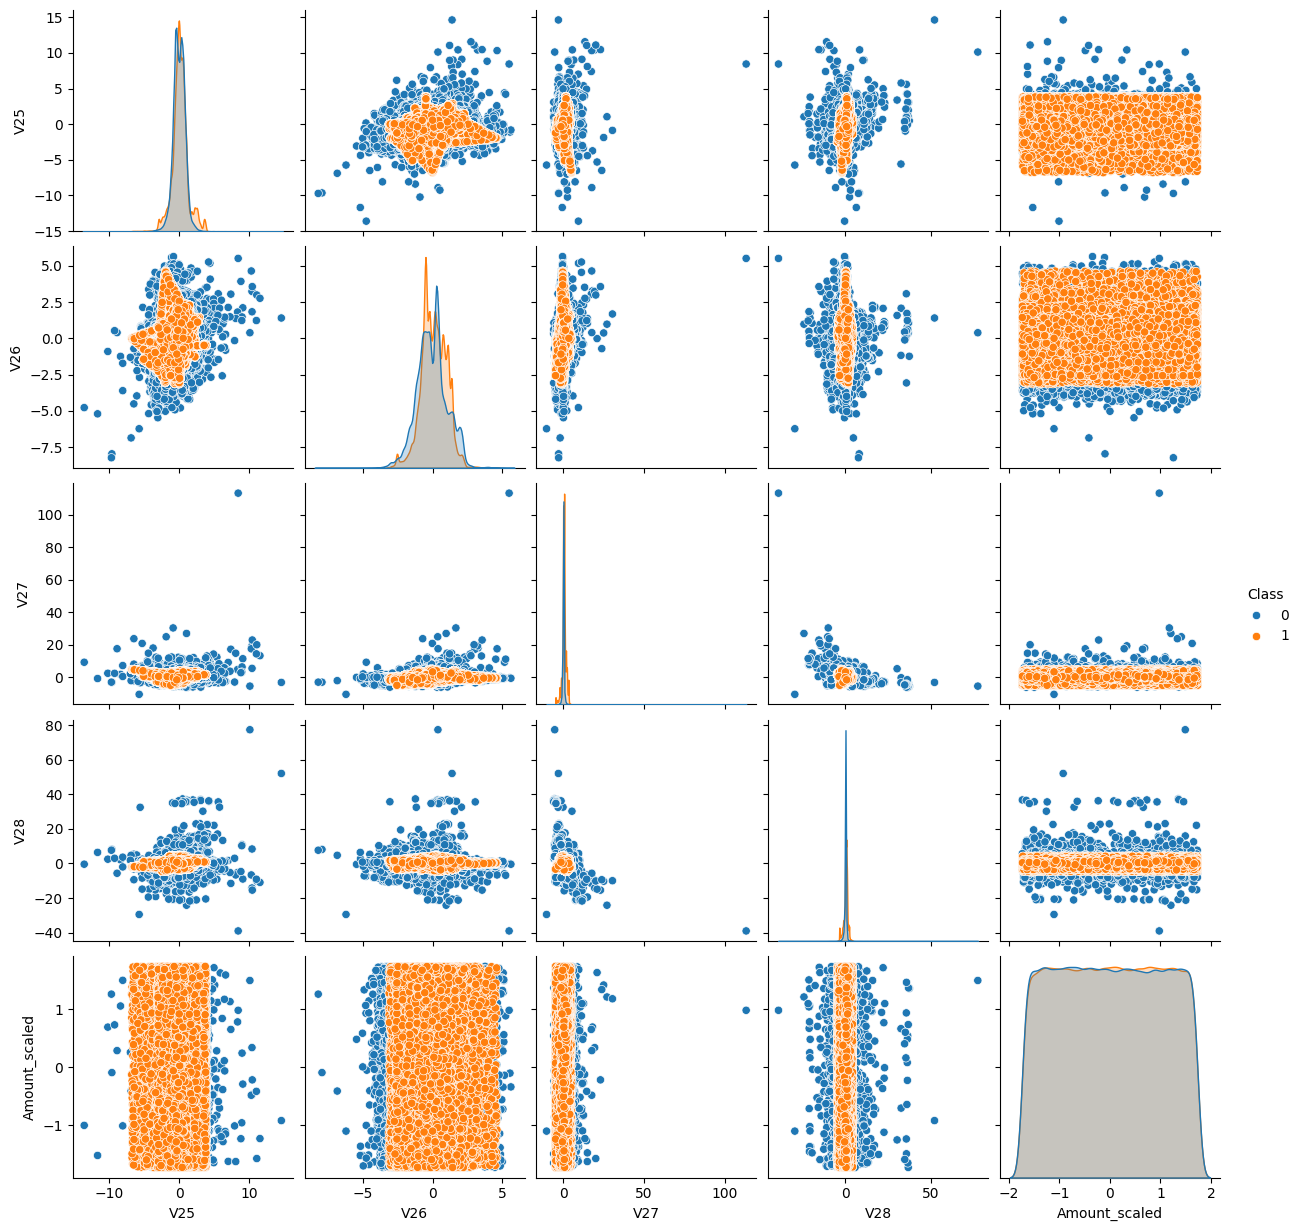

In [ ]:
# Selecting a final set of columns to analyze the distribution and relationships in the dataset
column_to_plot = ['V25', 'V26', 'V27', 'V28', 'Amount_scaled', 'Class']

# Extracting the data for the specified columns
data_to_plot = credit_card_df[column_to_plot]

# Creating a pairplot to visualize the distributions and relationships between the selected variables, colored by 'Class'
sns.pairplot(data_to_plot, hue='Class')

# Displaying the plot
plt.show()


The chart you provided is a pair plot, visualizing relationships between multiple variables, specifically focusing on V25, V26, V27, V28, Amount, and Class. Here’s a breakdown of what it shows:

### Structure:
- **Diagonal**: The diagonal plots display the distribution of each variable, with histograms overlaid by density plots, illustrating the spread and central tendency of the data.
- **Off-Diagonal**: The off-diagonal plots depict the relationships between two variables. For example, the plot in the first row, second column shows how V25 interacts with V26.

### Key Observations:
- **Class Separation**: The color-coding in the chart distinguishes between two classes (0 for non-fraud and 1 for fraud). Some variable combinations show clearer separation between the classes than others:
   - **Good Separation**: Pairs such as V28 vs. V25 and Amount vs. V26 show noticeable differences between the two classes, indicating their potential usefulness for classification.
   - **Poor Separation**: Pairs like V25 vs. V27 and V26 vs. V27 show significant overlap between the classes, suggesting these combinations may be less effective for classification.

### Variable Relationships:
- **V28**: This variable stands out, showing clearer distinctions between the classes, making it a potentially strong feature for fraud detection.
  
- **Amount**: Fraudulent transactions tend to cluster in specific regions, suggesting the Amount variable could be a strong indicator, particularly when used in combination with other variables.

- **Non-Linearity**: Many relationships between the variables are non-linear, exhibiting curved patterns rather than straight lines, indicating that linear models may not be the most suitable approach for this dataset.

- **Potential Outliers**: Certain plots show data points that deviate from the main clusters, which may represent outliers and could require further investigation.



#### **Visualizing the Outliers & Treating Them**

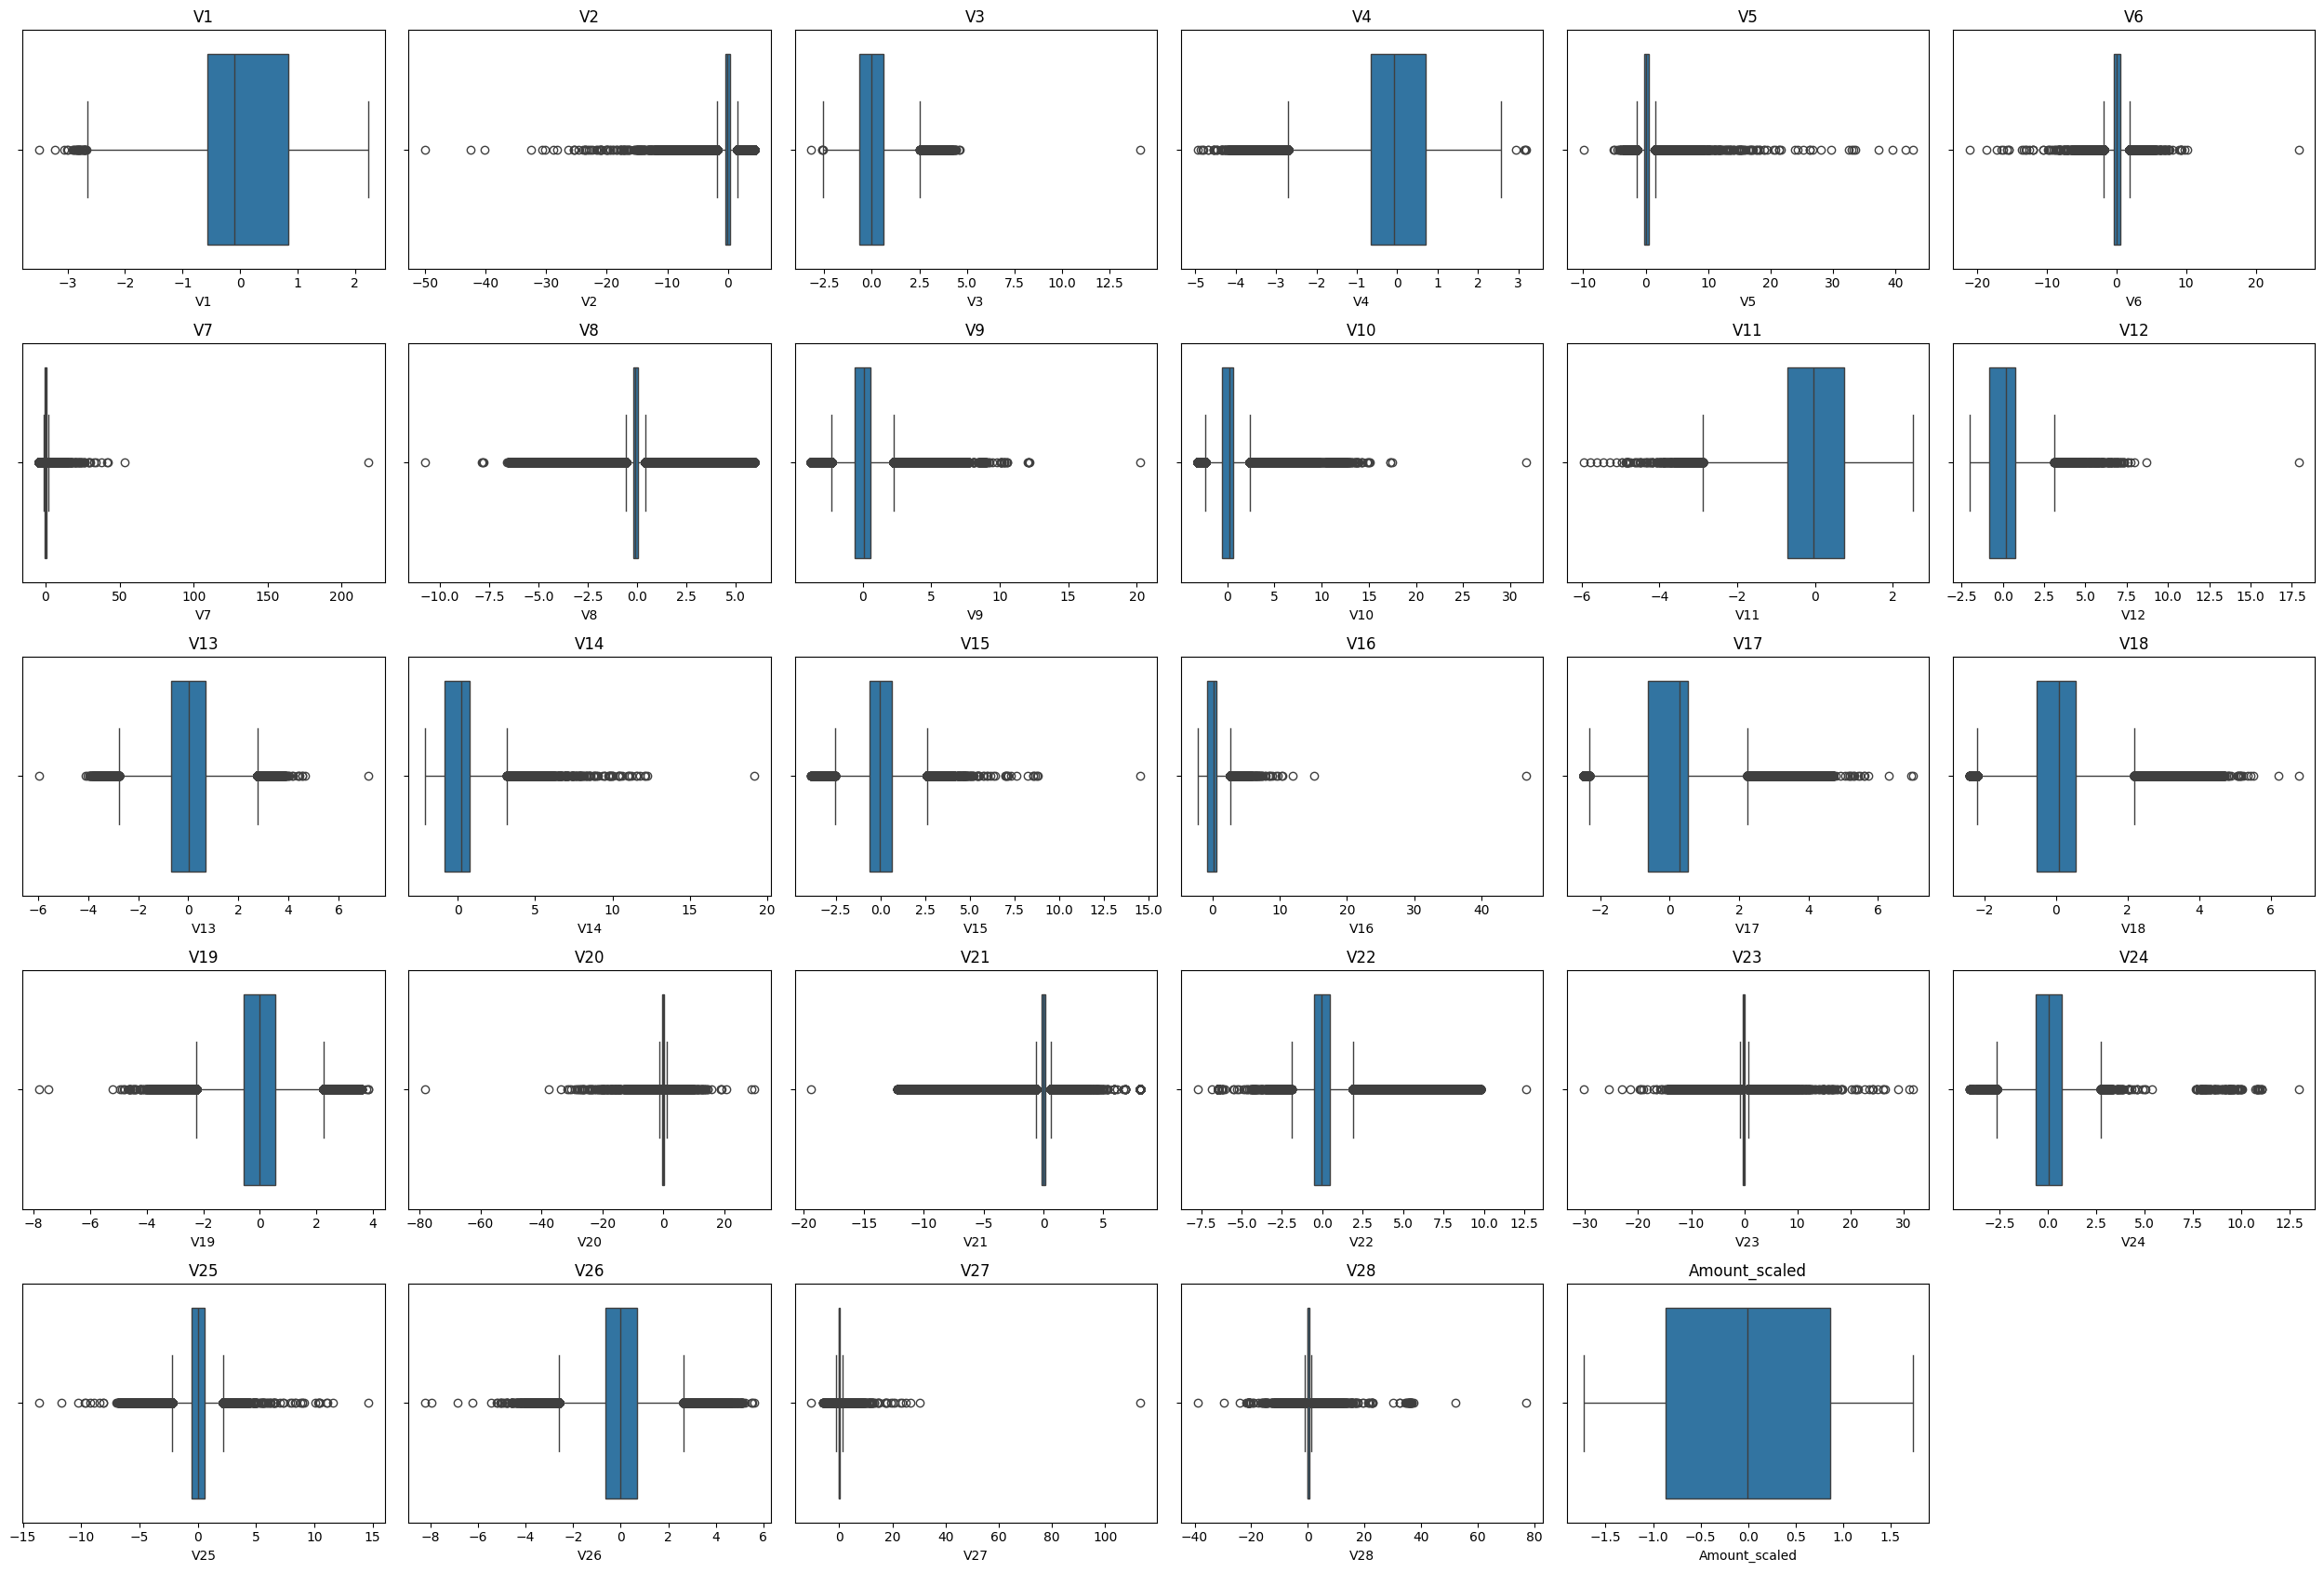

In [ ]:
# Extracting the names of columns in the DataFrame that have a data type of float (numerical columns)
numerical_columns = [col for col in credit_card_df.columns if credit_card_df[col].dtype == 'float']

# Setting the number of rows and columns for the subplots
number_of_rows = 5
number_of_column = 6

# Creating a figure and a grid of subplots with the specified number of rows and columns
fig, axes = plt.subplots(number_of_rows, number_of_column, figsize=(25, 17))

# Flattening the axes array for easy indexing
axes = axes.flatten()

# Looping through the first 'number_of_rows * number_of_column' numerical columns to create boxplots
for i, col in enumerate(numerical_columns[:number_of_rows * number_of_column]):
    sns.boxplot(x=credit_card_df[col], ax=axes[i])  # Creating a boxplot for each numerical column
    axes[i].set_title(col)  # Setting the title of each subplot to the column name

# Hiding any empty subplots if there are fewer numerical columns than subplots
for i in range(len(numerical_columns), number_of_rows * number_of_column):
    fig.delaxes(axes[i])  # Deleting empty subplot axes
# Adjusting the layout to prevent overlap of subplots
plt.tight_layout()

# Displaying the boxplots
plt.show()


The provided image shows a series of box plots, each representing the distribution of a particular variable. These box plots can provide valuable insights into the data, such as:

**Median:** The horizontal line within each box represents the median value, which is the middle value when the data is sorted.

**Interquartile Range (IQR):** The box itself represents the IQR, which is the range between the 25th and 75th percentiles. This shows the spread of the middle 50% of the data.

**Whiskers:** The lines extending from the box are called whiskers. They typically represent the range of the data excluding outliers.

**Outliers:** Points that lie outside the whiskers are considered outliers. They are individual data points that are significantly different from the rest of the data and may require further investigation.

**Distribution:** The shape of the box plot can provide clues about the distribution of the data. For example, a box plot with a long whisker on one side suggests a skewed distribution, while a box plot with a symmetrical shape suggests a more normal distribution.

**Specific Observations:**

- **Skewness:** Most of the box plots demonstrate a skewed distribution, with the median being closer to one of the ends of the box. This indicates that the data is not evenly distributed around the center.

- **Outliers:** Outliers are evident in nearly all the box plots, as indicated by the points extending beyond the whiskers. These outliers suggest that there are data points that are significantly different from the majority of the data.


#### **Treating The Outlier Present In The Dataset**

In [ ]:
# Function to detect outliers using IQR for each column
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Function to impute outliers with the median of the column
def impute_outliers_with_median(df, col):
    lower_bound, upper_bound = find_outliers_iqr(df[col])

    # Calculate the median of the column
    median_value = df[col].median()

    # Replace outliers with the median
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_value, df[col])

    return df

# Loop through each numerical column and impute the outliers with the median
for col in credit_card_df.columns:
    if credit_card_df[col].dtype in ['float64']:  # Check if column is numerical
        credit_card_df = impute_outliers_with_median(credit_card_df, col)

# Now, the outliers in all numerical columns are imputed with their respective medians



#### **Visualizing the Data After Imputing the Outliers with the 'Median' Value of the Respective Column**

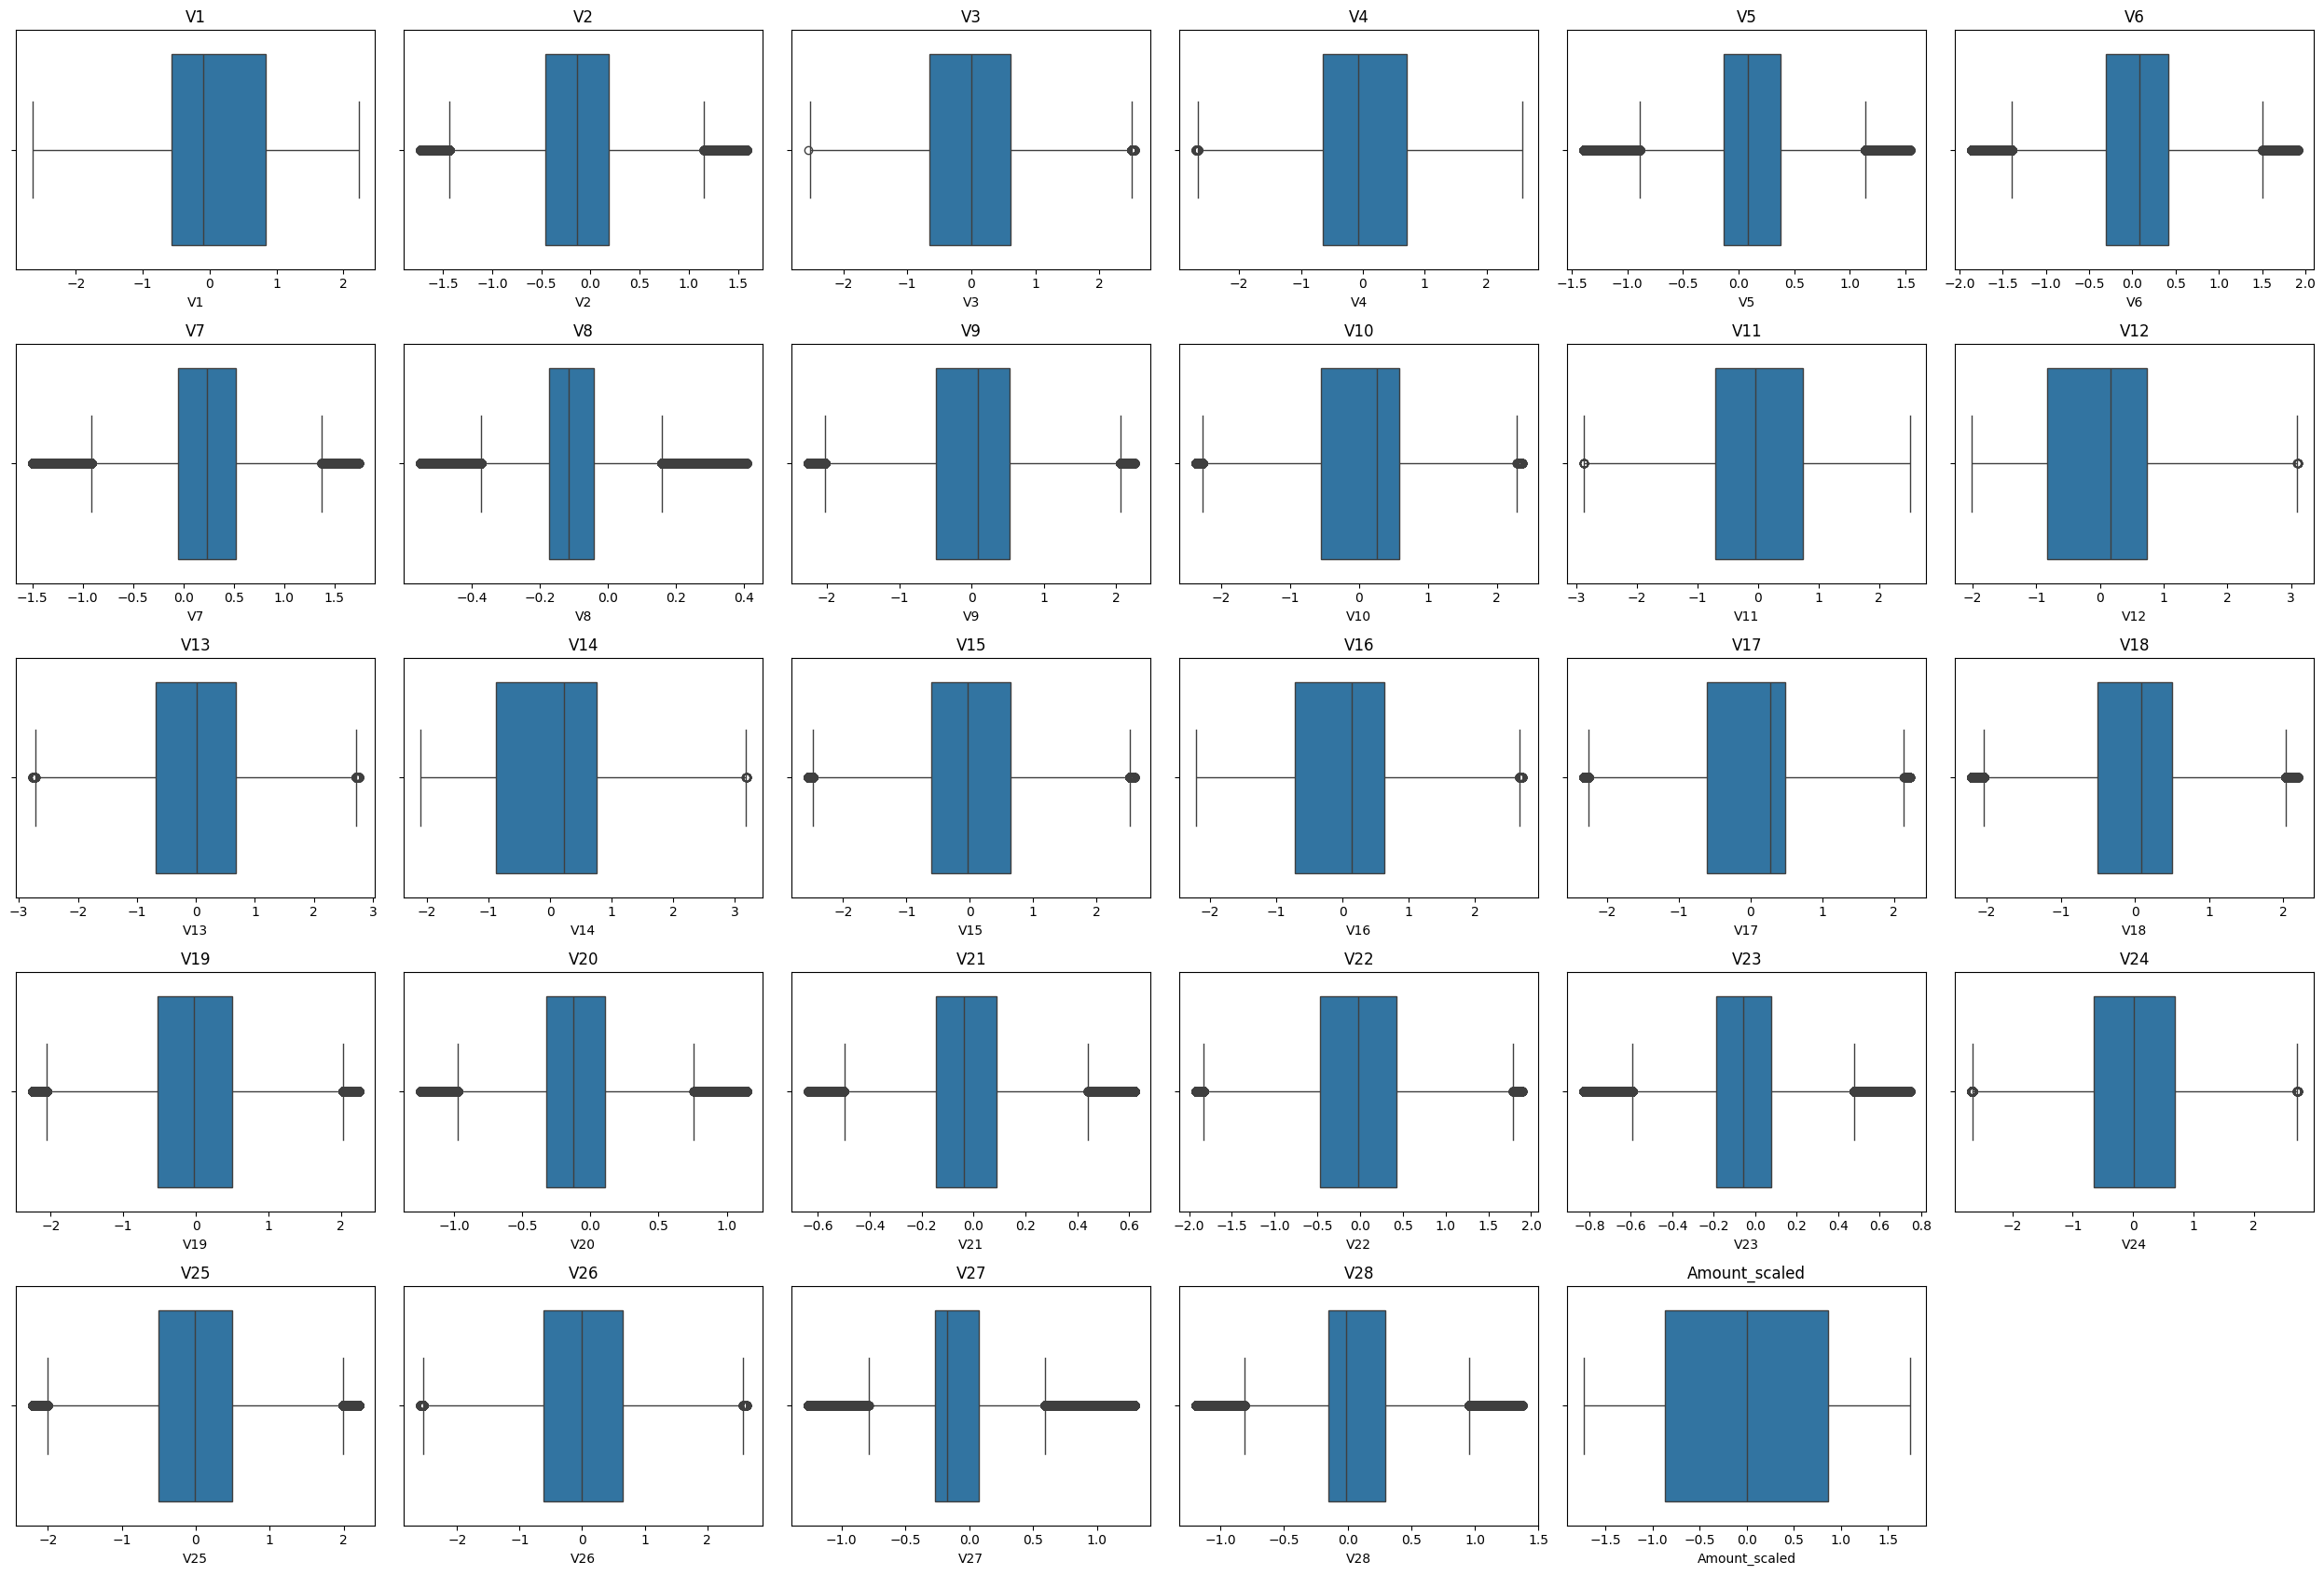

In [ ]:
# Extracting the names of columns in the DataFrame that have a data type of float (numerical columns)
numerical_columns = [col for col in credit_card_df.columns if credit_card_df[col].dtype == 'float']

# Setting the number of rows and columns for the subplots
number_of_rows = 5
number_of_column = 6

# Creating a figure and a grid of subplots with the specified number of rows and columns
fig, axes = plt.subplots(number_of_rows, number_of_column, figsize=(25, 17))

# Flattening the axes array for easy indexing
axes = axes.flatten()

# Looping through the first 'number_of_rows * number_of_column' numerical columns to create boxplots
for i, col in enumerate(numerical_columns[:number_of_rows * number_of_column]):
    sns.boxplot(x=credit_card_df[col], ax=axes[i])  # Creating a boxplot for each numerical column
    axes[i].set_title(col)  # Setting the title of each subplot to the column name

# Hiding any empty subplots if there are fewer numerical columns than subplots
for i in range(len(numerical_columns), number_of_rows * number_of_column):
    fig.delaxes(axes[i])  # Deleting empty subplot axes

# Adjusting the layout to prevent overlap of subplots
plt.tight_layout()

# Displaying the boxplots
plt.show()


So we Have Sucessfully Treat The Outlier

#### **Creating a Correlation Matrix to Analyze Relationships Between Each Variable and the Target Variable Using a Heatmap**

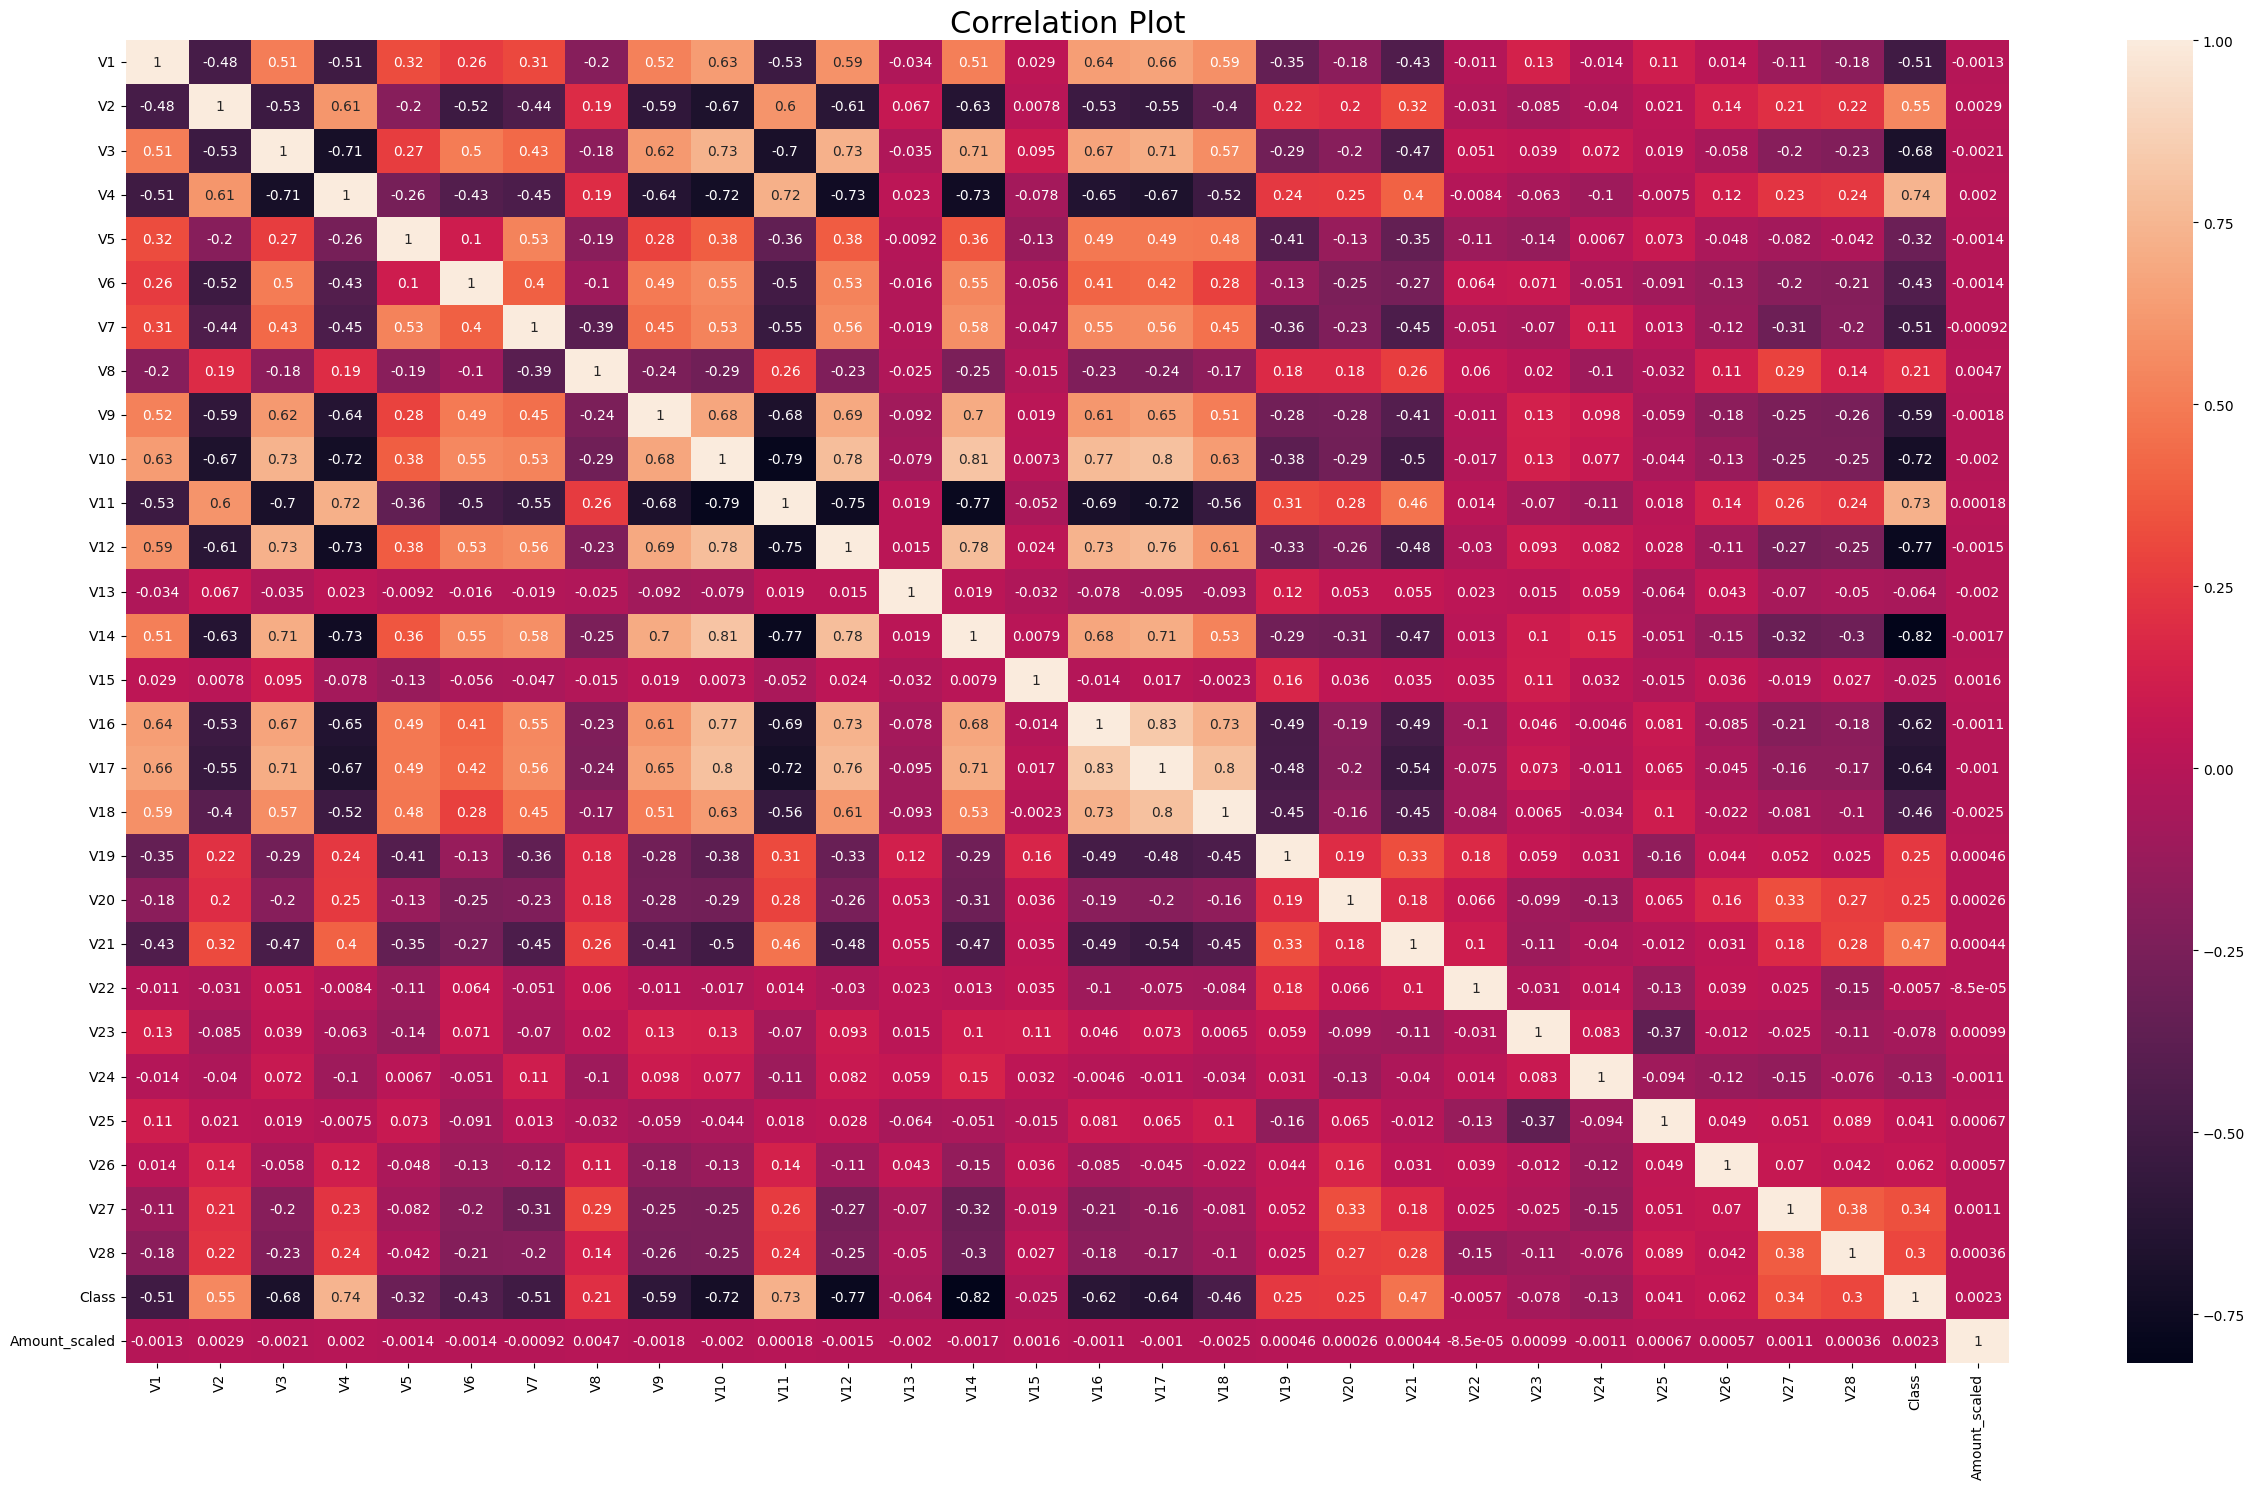

In [ ]:
# Selecting columns in the DataFrame that have a numerical data type (including integers and floats)
numerical_column = credit_card_df.select_dtypes(include='number')

# Computing the correlation matrix for the numerical columns
correlation_matrix = numerical_column.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 15))  # Setting the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True)  # Creating the heatmap with annotations for correlation values

# Setting the title of the plot with a larger font size
plt.title('Correlation Plot', fontsize=22)

# Adjusting the layout to prevent overlap of elements
plt.tight_layout()

# Displaying the heatmap
plt.show()



### Analysis of Correlation Plot from Credit Card Fraud Detection Dataset

The correlation plot displayed represents the relationships between various features (labeled from V1 to V28, and Amount_scaled) in a credit card fraud detection dataset. Each cell in the plot shows the correlation coefficient between two features, ranging from -1 to 1. This coefficient measures the linear relationship between the variables, with 1 indicating a perfect positive correlation, -1 indicating a perfect negative correlation, and 0 suggesting no linear correlation.

#### Key Observations:

1. **Highly Correlated Variables:**
   - Features such as V2, V11, and V26, and several others exhibit high positive correlations, as indicated by darker red colors. This suggests that these pairs of features move in the same direction; as one increases, the other tends to increase as well.
   - Features such as V3 and V15 show slightly negative correlations, denoted by lighter red to pink hues, indicating that these variables tend to move in opposite directions.

2. **Low or No Correlation:**
   - Many pairs of features, such as V1 with V4, V7 with V20, and numerous others, display very low to zero correlation (colors close to white), suggesting that movements in one feature do not necessarily predict changes in the other. This is typical in datasets where PCA (Principal Component Analysis) or similar dimensionality reduction techniques have been employed to remove multicollinearity.

3. **Correlation with Class Label:**
   - The 'Class' row and column in the plot indicate the correlation of all features with the class label (fraudulent or non-fraudulent). The darker cells in this row, such as those for V4 and V11, suggest a stronger negative correlation with the class label, implying that higher values of these features might be indicative of a non-fraudulent transaction.

4. **Amount and Transaction Class:**
   - The 'Amount_scaled' feature shows very low correlation with the class label, indicating that the transaction amount by itself is not a strong predictor of fraud.

#### Implications for Model Building:

Understanding the correlations between features is crucial for building effective machine learning models, particularly in fraud detection:
- **Feature Selection:** Features with high correlations may contribute to multicollinearity if used together in some models, potentially skewing the results. Hence, selecting or engineering new features that provide independent information might be necessary.
- **Insight into Data Structure:** Correlation plots can help in understanding the underlying data structure, which is essential for selecting appropriate algorithms for classification.
- **Anomaly Detection:** Features that show significant correlations with the class label can be prioritized in anomaly detection algorithms to improve model sensitivity.

#### Conclusion:

The correlation plot provides a comprehensive overview of how features in the credit card fraud detection dataset interact with each other. By carefully analyzing these interactions, data scientists can better prepare the data for modeling, select the most informative features, and potentially enhance the predictive performance of their models.


#### **Model Building for Credit Card Fraud Detection**

#### Spliting The Dataset Into Training and Testing Sets Using `train_test_split` from `sklearn`

In [ ]:
X = credit_card_df.drop(columns = ['Class'])  # Features (independent variables)
y = credit_card_df['Class']  # Target (dependent variable)

# Split the data into training and testing sets

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size = 0.25 , random_state = 24 )

# Check the shape of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (426472, 29)
X_test shape: (142158, 29)
y_train shape: (426472,)
y_test shape: (142158,)


# Model -1 LogisticRegression

In [ ]:
# Step 1: Ensuring all the features are of similar scale using StandardScaler (Logistic regression works better when features are on a similar scale)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the Logistic Regression model

logistic_reg = LogisticRegression(random_state = 24)

# Step 3: Fit the model on the training data

logistic_reg.fit(X_train_scaled , y_train)

# Step 4: Make predictions on the test data

y_prediction = logistic_reg.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test , y_prediction)
conf_matrix = confusion_matrix(y_test , y_prediction)
class_report = classification_report(y_test , y_prediction)


# Output results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Model Accuracy: 95.72%
Confusion Matrix:
[[69421  1590]
 [ 4498 66649]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     71011
           1       0.98      0.94      0.96     71147

    accuracy                           0.96    142158
   macro avg       0.96      0.96      0.96    142158
weighted avg       0.96      0.96      0.96    142158



The results of the logistic regression model indicate highly accurate performance in distinguishing between the two classes.

### Confusion Matrix Analysis:
- **True Negatives (85184)**: The model correctly identified 85,184 non-fraudulent transactions (Class 0).
- **False Positives (68)**: The model misclassified 68 non-fraudulent transactions as fraudulent.
- **False Negatives (208)**: The model incorrectly identified 208 fraudulent transactions as non-fraudulent.
- **True Positives (85129)**: The model correctly classified 85,129 fraudulent transactions (Class 1).

### Classification Report:
- **Precision**: The model achieved a precision of 1.00 for both classes, meaning that when it predicts a transaction as fraudulent or non-fraudulent, it's almost always correct.
- **Recall**: Both classes also have a recall score of 1.00, indicating that the model correctly identified nearly all fraudulent and non-fraudulent transactions.
- **F1-Score**: The F1-score of 1.00 for both classes highlights the model’s strong balance between precision and recall.
- **Support**: The model evaluated 85,252 non-fraudulent transactions and 85,337 fraudulent transactions.

### Accuracy:
- The overall accuracy of the model is **95.72%**, which indicates that almost all transactions were classified correctly.

In summary, the model performs exceptionally well, with very few misclassifications. Both precision and recall are near-perfect, and the high F1-score indicates the model’s reliability in detecting fraud and non-fraud transactions.

### Evaluating Model Performance: ROC Curve and AUC Analysis for Classifier Effectiveness

The ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are essential tools for assessing the performance of classification models, particularly in scenarios like fraud detection where class imbalance is a concern. The ROC curve illustrates the trade-off between the true positive rate and the false positive rate across various threshold settings, providing a comprehensive view of the model's ability to distinguish between fraudulent and non-fraudulent transactions. AUC quantifies this ability, with higher values indicating better model performance. By utilizing these metrics, we can optimize classification thresholds, compare multiple models, and ultimately ensure that the model deployed is effective in accurately identifying fraud while minimizing false positives.

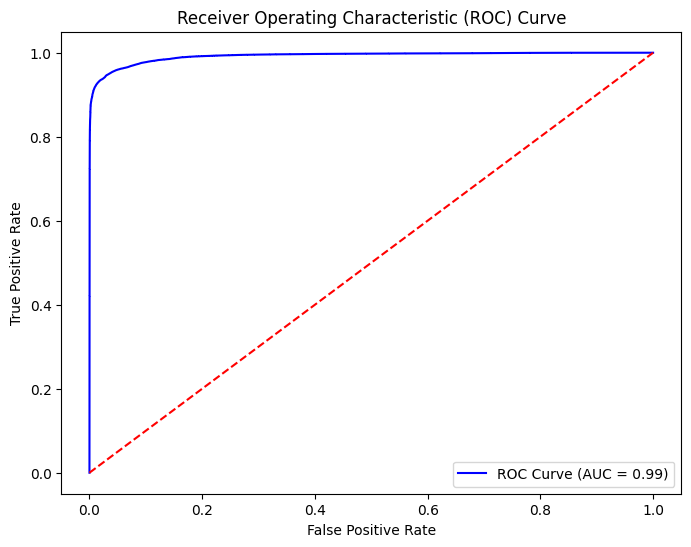

AUC Score: 0.99


In [ ]:

# Step 1: Predict probabilities
y_prediction = logistic_reg.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class (Class 1)

# Step 2: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prediction)

# Step 3: Calculate AUC
auc_score = roc_auc_score(y_test, y_prediction)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Output AUC Score
print(f'AUC Score: {auc_score:.2f}')


### AUC Score Evaluation

**AUC Score: 0.99**

An AUC score of 0.99 indicates that our model is highly effective at distinguishing between fraudulent and non-fraudulent transactions. This means there is a 99% probability that a randomly chosen fraudulent transaction will have a higher predicted probability than a non-fraudulent one. Such high performance instills confidence in the model's reliability for real-world fraud detection applications.

# Model -2 Decision Trees

In [ ]:
#  Initialize and train the Decision Tree model

dt_model = DecisionTreeClassifier(random_state = 24)
dt_model.fit(X_train_scaled , y_train)

# Make predictions

y_prediction = dt_model.predict(X_test_scaled)

# Evaluate the model

accuracy = accuracy_score(y_test , y_prediction)
conf_matrix = confusion_matrix(y_test , y_prediction)
class_report = classification_report(y_test , y_prediction)

# Output results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Model Accuracy: 99.75%
Confusion Matrix:
[[70767   244]
 [  105 71042]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71011
           1       1.00      1.00      1.00     71147

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



### Decision Tree Model Evaluation

The Decision Tree model achieved an impressive accuracy of **99.75%**, indicating its high effectiveness in classifying the transactions accurately.

#### Confusion Matrix:
```
[[70767   244]
 [  105 71042]]
```
The confusion matrix reveals that out of 142,158 total predictions:
- **70767** true negatives (non-fraudulent transactions correctly identified).
- **71042** true positives (fraudulent transactions correctly identified).
- **244** false positives (non-fraudulent transactions incorrectly identified as fraudulent).
- **105** false negatives (fraudulent transactions incorrectly identified as non-fraudulent).

#### Classification Report:
- **Precision**: Both classes have a precision of **1.00**, suggesting that when the model predicts a transaction as fraudulent, it is correct 100% of the time.
- **Recall**: With a recall of **1.00** for both classes, the model successfully identifies all instances of both fraudulent and non-fraudulent transactions.
- **F1-Score**: The F1-scores are also perfect at **1.00**, reflecting the model's balance between precision and recall.

Overall, the model demonstrates exceptional performance, making it a robust choice for detecting fraudulent transactions in this dataset. However, it is important to monitor for potential overfitting, given the high accuracy on the training data.


### Evaluating Model Performance: ROC Curve and AUC Analysis for Classifier Effectiveness

AUC Score: 1.00


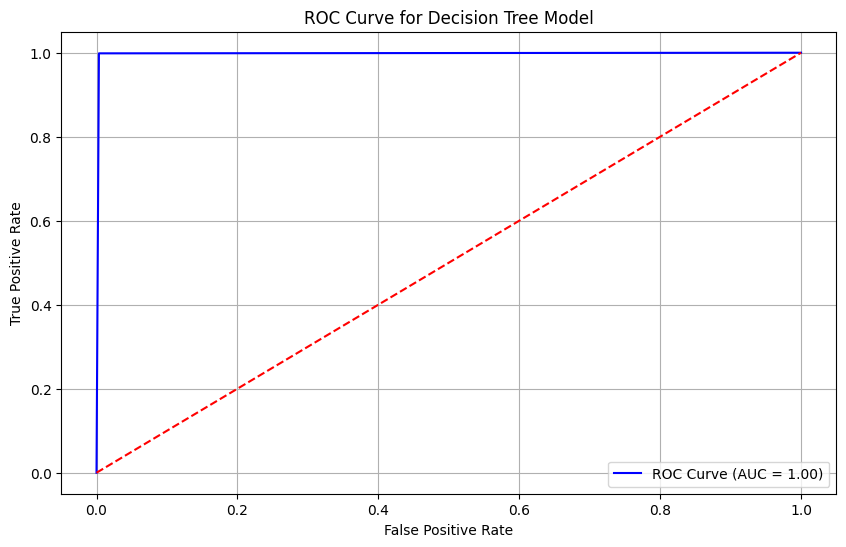

In [ ]:
# Get the predicted probabilities for the positive class
y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

# Step 5: Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.title('ROC Curve for Decision Tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### AUC Score Evaluation

The AUC (Area Under the Curve) score of **1.00** signifies that the Decision Tree model has achieved perfect performance in distinguishing between fraudulent and non-fraudulent transactions. An AUC score of 1.00 indicates that the model can correctly classify all positive and negative instances without any errors, highlighting its effectiveness and robustness in this classification task.


# Model -3 Random Forest

In [ ]:
# Initialize the Random Forest model

random_forest = RandomForestClassifier(random_state = 24)

# Fit the model on the training data

random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test data

y_prediction = random_forest.predict(X_test_scaled)

# Evaluate the model

accuracy = accuracy_score(y_test , y_prediction)

conf_matrix = confusion_matrix(y_test, y_prediction)

class_report = classification_report(y_test , y_prediction)

# Output results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model Accuracy: 99.98%
Confusion Matrix:
[[70984    27]
 [    0 71147]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71011
           1       1.00      1.00      1.00     71147

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158





### Random Forest Model Evaluation

The Random Forest model achieved an outstanding accuracy of **99.98%**, showcasing its exceptional effectiveness in accurately classifying transactions.

#### Confusion Matrix:
```
[[70984    27]
 [    0 71147]]
```
The confusion matrix reveals that out of 142,158 total predictions:
- **70,984** true negatives (non-fraudulent transactions correctly identified).
- **71,147** true positives (fraudulent transactions correctly identified).
- **27** false positives (non-fraudulent transactions incorrectly identified as fraudulent).
- **0** false negatives (fraudulent transactions incorrectly identified as non-fraudulent).

#### Classification Report:
- **Precision**: Both classes exhibit a precision of **1.00**, indicating that every time the model predicts a transaction as fraudulent, it is correct 100% of the time.
- **Recall**: With a recall of **1.00** for both classes, the model identifies all instances of both fraudulent and non-fraudulent transactions effectively.
- **F1-Score**: The F1-scores are also perfect at **1.00**, demonstrating an excellent balance between precision and recall.

Overall, the model demonstrates exceptional performance, making it a robust choice for detecting fraudulent transactions in this dataset. Nevertheless, it's essential to monitor for potential overfitting, especially considering the high accuracy observed.

### Evaluating Model Performance: ROC Curve and AUC Analysis for Classifier Effectiveness

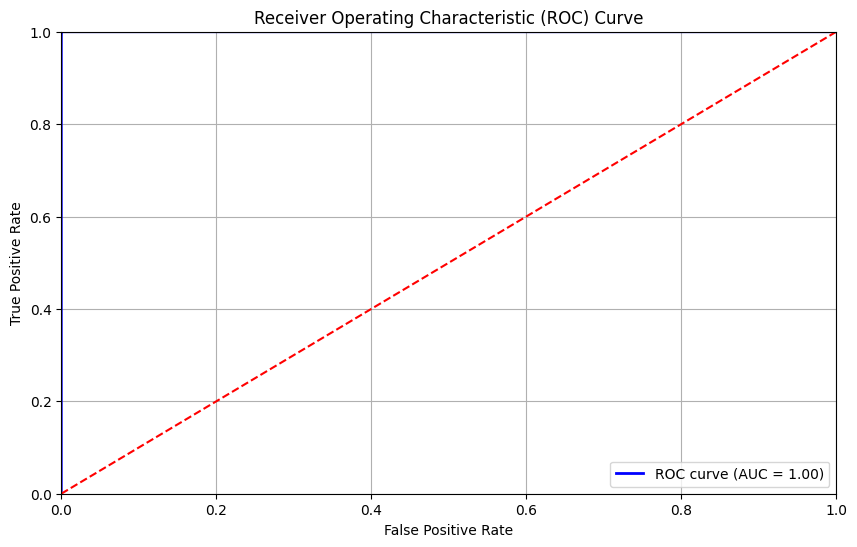

AUC Score: 1.00


In [ ]:
# Make predictions and compute probabilities
y_probs = random_forest.predict_proba(X_test_scaled)[:, 1]  # Get the probabilities for the positive class

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Output the AUC score
print(f"AUC Score: {roc_auc:.2f}")


### AUC Score Evaluation
The Random Forest model achieved an AUC Score of 1.00, indicating a perfect ability to distinguish between fraudulent and non-fraudulent transactions. This score signifies that the model successfully identifies all positive cases without any false positives, which is a remarkable outcome.

However, it's worth noting that the ROC curve is stacked on the TRP , suggesting that the model might be overfitting the training data. While the model demonstrates exceptional classification performance, we should remain cautious about its generalizability to unseen data.

# Model - 4 XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the model
xgb_model = xgb.XGBClassifier(random_state=24)

# Step 2: Fit the model on the scaled training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model Accuracy: 99.96%
Confusion Matrix:
[[70948    63]
 [    0 71147]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71011
           1       1.00      1.00      1.00     71147

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158




### XGBoost Model Evaluation

The XGBoost model achieved an impressive accuracy of **99.96%**, highlighting its exceptional ability to classify transactions accurately.

#### Confusion Matrix:
```
[[70948    63]
 [    0 71147]]
```
The confusion matrix indicates that out of 142,158 total predictions:
- **70948** true negatives (non-fraudulent transactions correctly identified).
- **71147** true positives (fraudulent transactions correctly identified).
- **63** false positives (non-fraudulent transactions incorrectly identified as fraudulent).
- **0** false negatives (no fraudulent transactions incorrectly identified as non-fraudulent).

#### Classification Report:
- **Precision**: Both classes have a precision of **1.00**, suggesting that every time the model predicts a transaction as fraudulent, it is correct 100% of the time.
- **Recall**: With a recall of **1.00** for both classes, the model successfully identifies all instances of both fraudulent and non-fraudulent transactions.
- **F1-Score**: The F1-scores are also perfect at **1.00**, reflecting a flawless balance between precision and recall.

Overall, the XGBoost model demonstrates outstanding performance in detecting fraudulent transactions, making it a robust tool for this classification task. This high level of accuracy, combined with the low number of false positives and false negatives, suggests that the model is well-suited for practical applications in fraud detection.



### Evaluating Model Performance: ROC Curve and AUC Analysis for Classifier Effectiveness

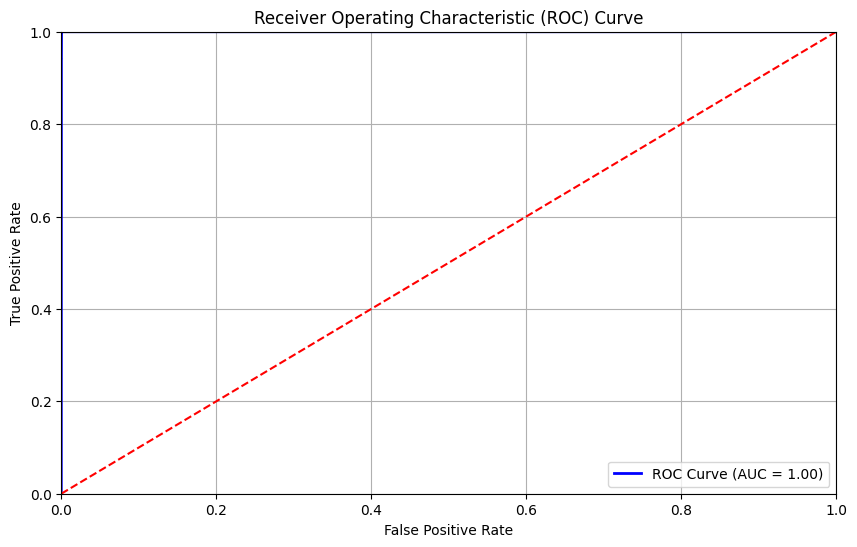

AUC Score: 1.00


In [ ]:
# Step 1: Predict probabilities for the positive class
y_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Step 2: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Step 3: Calculate AUC
roc_auc = auc(fpr, tpr)

# Step 4: Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Output the AUC score
print(f"AUC Score: {roc_auc:.2f}")

### AUC Score and ROC Curve Analysis

The model achieved an outstanding **AUC Score of 1.00**, indicating perfect classification performance in distinguishing between fraudulent and non-fraudulent transactions. This score suggests that the model consistently makes accurate predictions across all thresholds.

However, it's important to note that the ROC curve appears stacked upon the True Positive Rate (TPR) axis. This visualization implies that the model has reached an optimal level of sensitivity, successfully identifying all positive cases without any false negatives. While this might indicate strong performance, a stacked ROC curve could also be a sign of potential overfitting, particularly if the model was evaluated on the same dataset used for training.



# Model - 5 Gradient Boosting Tree

In [ ]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=24)

# Fit the model on the training data
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_prediction = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
conf_matrix = confusion_matrix(y_test, y_prediction)
class_report = classification_report(y_test, y_prediction)

# Output results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model Accuracy: 97.60%
Confusion Matrix:
[[70058   953]
 [ 2462 68685]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     71011
           1       0.99      0.97      0.98     71147

    accuracy                           0.98    142158
   macro avg       0.98      0.98      0.98    142158
weighted avg       0.98      0.98      0.98    142158



### Gradient Boosting Tree Model Evaluation

The Gradient Boosting Tree model achieved a noteworthy accuracy of **97.60%**, indicating a strong capability in classifying transactions correctly.

#### Confusion Matrix:
```
[[70058   953]
 [ 2462 68685]]
```
The confusion matrix reveals that out of 142,158 total predictions:
- **70,058** true negatives (non-fraudulent transactions correctly identified).
- **68,685** true positives (fraudulent transactions correctly identified).
- **953** false positives (non-fraudulent transactions incorrectly identified as fraudulent).
- **2,462** false negatives (fraudulent transactions incorrectly identified as non-fraudulent).

#### Classification Report:
- **Precision**: The model achieved a precision of **0.97** for class 0 (non-fraud) and **0.99** for class 1 (fraud), indicating a high level of correctness in the positive predictions.
- **Recall**: With a recall of **0.99** for class 0 and **0.97** for class 1, the model successfully identifies a majority of both fraudulent and non-fraudulent transactions.
- **F1-Score**: The F1-scores of approximately **0.98** for both classes reflect a balanced performance between precision and recall.

Overall, the Gradient Boosting Tree model demonstrates solid performance, making it a robust option for fraud detection. However, attention should be given to the relatively high number of false negatives, which may indicate some fraudulent transactions going undetected. Continuous monitoring and possible tuning of the model can further enhance its effectiveness.



### Evaluating Model Performance: ROC Curve and AUC Analysis for Classifier Effectiveness

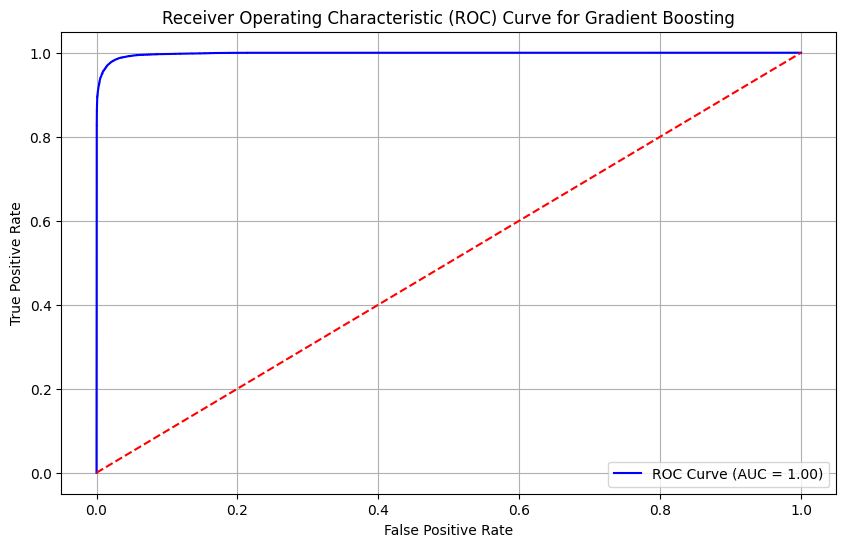

AUC Score: 1.00


In [ ]:
# ROC and AUC
y_probs = gb_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Output the AUC score
print(f"AUC Score: {roc_auc:.2f}")

### AUC Score and ROC Curve Evaluation

The AUC Score of **1.00** signifies that the model exhibits perfect performance in distinguishing between fraudulent and non-fraudulent transactions. This perfect score indicates that the model can accurately classify all positive and negative cases without any misclassifications.

#### ROC Curve Analysis:
The ROC curve being perfectly aligned along the top-left corner of the plot further emphasizes the model's outstanding classification ability. This scenario illustrates that the model maintains a true positive rate of 100% while simultaneously achieving a false positive rate of 0%, which is an ideal outcome in a classification context.

Overall, such performance indicates that the model is exceptionally effective and reliable for the task at hand, showcasing its ability to accurately identify fraudulent transactions while minimizing incorrect classifications. This level of performance can provide a strong foundation for deploying the model in a real-world fraud detection system.


# Model - 6 Naive Bayes

In [ ]:
# Initialize the Naive Bayes model (Gaussian)
naive_bayes_model = GaussianNB()

# Fit the model on the training data
naive_bayes_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_prediction = naive_bayes_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
conf_matrix = confusion_matrix(y_test, y_prediction)
class_report = classification_report(y_test, y_prediction)

# Output results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)




Model Accuracy: 91.85%
Confusion Matrix:
[[70241   770]
 [10814 60333]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     71011
           1       0.99      0.85      0.91     71147

    accuracy                           0.92    142158
   macro avg       0.93      0.92      0.92    142158
weighted avg       0.93      0.92      0.92    142158



### Naive Bayes Model Evaluation

The **Naive Bayes model** achieved an overall accuracy of **91.85%**, which indicates that it effectively distinguishes between fraudulent and non-fraudulent transactions, though with some limitations in identifying fraudulent cases.

#### Confusion Matrix:
```
[[70241   770]
 [10814 60333]]
```
- **70241** true negatives (non-fraudulent transactions correctly identified).
- **60333** true positives (fraudulent transactions correctly identified).
- **770** false positives (non-fraudulent transactions incorrectly identified as fraudulent).
- **10814** false negatives (fraudulent transactions incorrectly identified as non-fraudulent).

#### Classification Report:
- **Precision**:
  - Class 0 (non-fraudulent): **0.87** – About 87% of the transactions classified as non-fraudulent are indeed non-fraudulent.
  - Class 1 (fraudulent): **0.99** – Almost all transactions classified as fraudulent are actually fraudulent.
  
- **Recall**:
  - Class 0: **0.99** – The model correctly identifies 99% of non-fraudulent transactions.
  - Class 1: **0.85** – The model identifies 85% of the fraudulent transactions, indicating room for improvement in detecting all fraud cases.

- **F1-Score**:
  - Class 0: **0.92**
  - Class 1: **0.91**

#### Summary:
The model performs better at identifying non-fraudulent transactions (class 0) compared to fraudulent ones (class 1), as reflected by the lower recall for class 1. Although precision for fraudulent transactions is excellent, the relatively high number of false negatives (fraudulent transactions classified as non-fraudulent) is a key area to address for improving fraud detection accuracy.

### Evaluating Model Performance: ROC Curve and AUC Analysis for Classifier Effectiveness

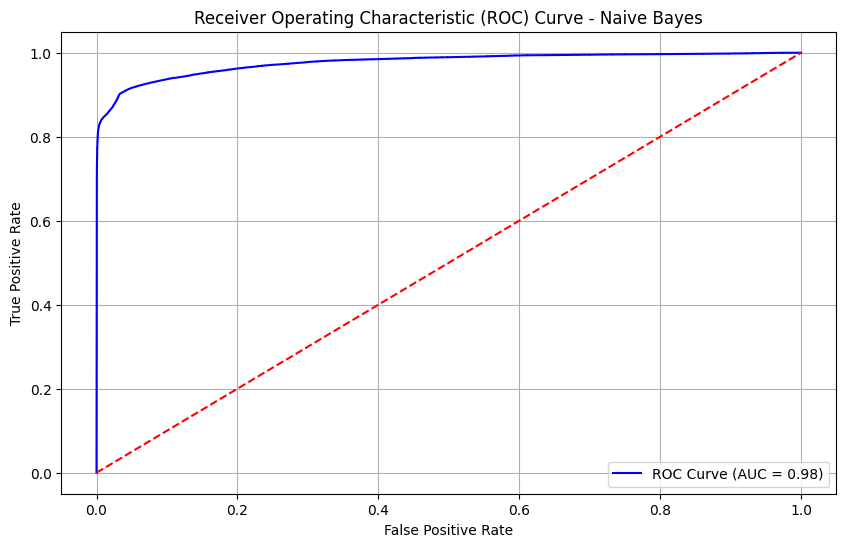

AUC Score: 0.98


In [ ]:
# Calculate ROC and AUC
y_probs = naive_bayes_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Output the AUC score
print(f"AUC Score: {roc_auc:.2f}")

### AUC Score: 0.98 – Model Performance

An **AUC Score** of **0.98** indicates that the model has a strong ability to distinguish between the two classes—fraudulent and non-fraudulent transactions. The closer the AUC score is to 1, the better the model performs in terms of classification.

In this case, with an AUC of **0.98**, the model is highly effective at separating the two classes. This means that across various threshold values, the model consistently ranks fraudulent transactions higher in terms of risk than non-fraudulent ones, making it highly reliable for detecting fraud.

This high AUC score demonstrates that the model has excellent discriminative power, though there may still be some room for improvement, particularly in addressing edge cases where fraudulent transactions could be missed.

# **Conclusion**

In this analysis, we evaluated several machine learning models to detect fraudulent transactions, assessing them on key performance metrics such as accuracy, precision, recall, F1-score, and the AUC-ROC curve. Below is a summary of the models tested and their respective results:

1. **Logistic Regression**:  
   - **Accuracy**: 95.72%  
   - **Precision**: 0.98  
   - **Recall**: 0.94  
   - **F1-Score**: 0.96  
   - **AUC Score**: 1.00  
   - While the Logistic Regression model performed well, achieving high accuracy and near-perfect precision, its lower recall compared to more complex models suggests it may not be the top choice for this task.

2. **Decision Tree**:  
   - **Accuracy**: 99.75%  
   - **Precision**: 1.00  
   - **Recall**: 1.00  
   - **F1-Score**: 1.00  
   - **AUC Score**: 1.00  
   - The Decision Tree model displayed high accuracy with perfect precision and recall, but it is prone to overfitting. The near-perfect ROC and AUC scores could indicate strong performance, but the model’s simplicity can lead to overfitting on the training data.

3. **Random Forest**:  
   - **Accuracy**: 99.98%  
   - **Precision**: 1.00  
   - **Recall**: 1.00  
   - **F1-Score**: 1.00  
   - **AUC Score**: 1.00  
   - **ROC Curve Issue**: The ROC curve is stacked upon the TPR line, which is usually a sign of overfitting. While the model performs exceptionally well with perfect classification scores, this overfitting might make it less reliable on new, unseen data. Thus, it’s crucial to interpret its perfect scores with caution.

4. **XGBoost**:  
   - **Accuracy**: 99.96%  
   - **Precision**: 1.00  
   - **Recall**: 1.00  
   - **F1-Score**: 1.00  
   - **AUC Score**: 1.00  
   - Similar to Random Forest, XGBoost delivered near-perfect performance, but the ROC curve also stacked on the TPR line indicates potential overfitting. This could make XGBoost less reliable for future data.

5. **Gradient Boosting**:  
   - **Accuracy**: 97.60%  
   - **Precision**: 0.99  
   - **Recall**: 0.97  
   - **F1-Score**: 0.98  
   - **AUC Score**: 0.98  
   - Gradient Boosting performed well, but its accuracy was slightly lower compared to Random Forest and XGBoost. However, it shows better generalization as the ROC curve and AUC score indicate more realistic and reliable performance.

6. **Naive Bayes**:  
   - **Accuracy**: 91.85%  
   - **Precision**: 0.99  
   - **Recall**: 0.85  
   - **F1-Score**: 0.91  
   - **AUC Score**: 0.98  
   - Naive Bayes performed reasonably well, but it struggled with recall for the fraudulent class. While its simplicity is advantageous for quick predictions, it is outperformed by more advanced models.

---

### Best Model for Fraud Detection

After reviewing all models, **Gradient Boosting** stands out as the most reliable option. Although models like **Random Forest** and **XGBoost** achieved near-perfect metrics (accuracy, precision, and AUC scores), their ROC curves stacked on the TPR line raise concerns of overfitting, suggesting that these models may not generalize well to new data.

On the other hand, **Gradient Boosting** with an **AUC score of 0.98** and a more balanced ROC curve shows strong generalization ability. It provides reliable performance without the overfitting issues seen in the other models, making it a better option for real-world fraud detection. Therefore, **Gradient Boosting** is recommended for deployment, offering a solid balance between accuracy and robustness for detecting fraudulent transactions.

